İstediğimiz Çıktılar:
* Mahalle/İlçe tehlike durumu belirleme (Çok Tehlike 3, Orta 2, Az Tehlike1) => Kümeleme ile mahalle/sınıfların örüntüsü/kümesi bulunacak.
* Regresyon ile Can Kaybı tahmini.
* Kurulan modeller ile ekrana Rapor çıkartacağız.
  * Mahallenin/İlçe'nin tehlike durumu
  * Mahalle/İlçe Can KAybı sayısı (Threshold ile az, orta, çok)
  * İçme suyu boru hasarı ile bölgede susuzluk sıkıntısı çekilecek uyarısı yapılabilir.
  * Doğalgaz boru hasarı ile (bina hasarı az ise) ısınma sorunları yaşayıp yaşamama sorunları çıkartılabilir.
  * Atık su boru hasarı ile kirlilik ölçeği belirlenebilir.
  * Geçiçi Barınma sayısının çok olduğu yerlerde taşınma tavsiyesi.

# Ön Bilgilendirme:
**Kullanılan Veri Setleri:**
* [Mahalle bazlı bina sayısı](https://data.ibb.gov.tr/dataset/mahalle-bazli-bina-analiz-verisi)
* [Deprem Senaryosu Analiz Sonuçları](https://data.ibb.gov.tr/dataset/deprem-senaryosu-analiz-sonuclari)

**Deprem Ölçüm Yöntemleri:**
* **The ML Scale/Local Magnitude Scale(Richter Magnitude Scale):**  Ses dalgaları ölçülerek depremin büyüklüğü tespit ediliyor. Ancak büyük depremlerde bu yöntem ile doğru ölçümlendirme yapılamıyor.

* **The MW Scale/ Moment Magnitude Scale (Moment Büyüklüğü):** Kandilli Rasathanesininde kullandığı bu ölçüm tekniği en karmaşığıdır. En yaygın kullanılan ve kabul gören yöntemdir. Depremin oluşturduğu momentin hesaplanması üzerine denklemler kurularak büyüklük hesaplanmaya çalışılır. 4'ün üzerindeki depremleri ölçmek için kullanılır.

* **The MD/ Duration Magnitude Scale(Süreye Bağlı Büyüklük):** Sarsıntının sismometre üzerinde yarattığı titreşimle ölçülür. 5'ten küçük depremler için kullanılıyor.  

* **The MS/ Surface Wave Magnitude Scale (Yüzey Dalga Büyüklüğü):** Yerel Büyüklük ve Süreye Bağlı Büyüklük yöntemlerinin yetersiz kaldığı, 6'nın üzerindeki depremlerde kullanılıyor. Yüzeyden yayılan dalgalar ölçülerek, büyüklük tespit ediliyor. Ölçüm yapılan mesafe arttıkça bu yöntemin güvenirliği de artıyor.

* **The MB/ Body Wave Magnitude Scale (Cisim Dalga Büyüklüğü):** Yüzey dalgaları yerine, derinliklere inen dalgaların ölçüldüğü yöntem.

**Genel Akış:**
Projemiz, İstanbul Büyük Şehir Belediyesi'nin hazırlamış ve araştırmış olduğu İstanbul'da gece (herkes evde iken) meydana gelmesi durumunda 7.5 MW'lik (Moment Magnitude Scale ile yapılan bir çalışma) bir depremin sebep olabileceği tahmini ölü ve yaralı sayısı hesaplanmış ve bunlar bir veri setinde toplanmıştır. "Aykırı Değerler" ekibi olarak biz de, bu analiz sonucunu inceleyip, model kurup sizlerin karşısına getirdik.


# Veri Setlerinin Tanıtımı


## Mahalle Bazlı Bina Sayısı:


Veri seti İstanbul sınırları içerisinde bulunan mahallelerde yer alan bina sayılarını içerir. Binalar yapım yılına ve kat sayısına göre kategorize edilmiştir. İlgili veri setinin güncellenme çalışmaları devam etmektedir. Biz bu verisetin indirdiğimizdeki en son güncellenme tarihi: 02/03/2023. Veri setinin oluşturulmaya başlandığı tarih: 16/01/2023.

Değişken Adları:
* ilce_adi: İstanbul içerisinde yer alan ilçe isimleri. (Çoklanmış)
* mahalle_adi:  İstanbul içerisinde yer alan mahalle isimleri.
* mahalle_uavt: Mahallelerin ulusal adres veri tabanı kodu (Unique ID'si).
* 1980_oncesi: Yapım yılı 1980 yılı öncesine rastlayan bina sayısını içerir.
* 1980-2000_arasi: Yapım yılı 1980 ile 2000 yılı arasında bulunan bina sayısını içerir.
* 2000_sonrasi: Yapım yılı 2000 yılı sonrasına rastlayan bina sayısını içerir.
* 1-4 kat_arası: 1 ile 4 kat arasındaki bina sayısını içerir.
* 5-9 kat_arasi: 5 ile 9 kat arasındaki bina sayısını içerir.
* 9-19 kat_arasi: 9 ile 19 kat arasındaki bina sayısını içerir.

## Deprem Senaryosu Analizi Sonuçları

Veri seti 7.5 Mw büyüklüğünde **gece** olacak deprem senaryosuna göre yapılan analizlerin sonuçlarını içerir. İlgili veri setinin güncellenme çalışmaları devam etmektedir. Biz bu veri setini aldığımızdaki son güncelleme tarihi: 02/03/2023. Veri seti oluşturulmaya başlandığı tarih: 19/03/2021.

Değişken Adları:
* ilce_adi: İstanbul içerisinde yer alan ilçe isimleri. (Çoklanmış)
* mahalle_adi:  İstanbul içerisinde yer alan mahalle isimleri.
* mahalle_uavt: Mahallelerin ulusal adres veri tabanı kodu (Unique ID'si).
* cok_agir_hasarli_bina_sayisi: Senaryoya göre depremden etkilenecek çok ağır hasarlı bina sayısını içerir.
* agir_hasarli_bina_sayisi: Senaryoya göre depremden etkilenecek ağır hasarlı bina sayısını içerir.
* orta_hasarli_bina_sayisi: Senaryoya göre depremden etkilenecek orta hasarlı bina sayısını içerir.
* hafif_hasarli_bina_sayisi: Senaryoya göre depremden etkilenecek hafif hasarlı bina sayısını içerir.
* can_kaybi_sayisi: Senaryoya göre depremde oluşabilecek can kaybı sayısını içerir.
* agir_yarali_sayisi: Senaryoya göre depremde oluşacak ağır yaralı sayısını içerir.
* hafif_yarali_sayisi: Senaryoya göre depremde oluşacak hafif yaralı sayısını içerir.
* hastanede_tedavi_sayisi: Senaryoya göre depremden sonra hastanede tedavi sayısını içerir.
* dogalgaz_boru_hasari: Senaryoya göre depremde hasar gören doğalgaz boru hattı sayısını içerir.
* icme_suyu_boru_hasari: Senaryoya göre depremde hasar gören içme suyu boru hattı sayısını içerir.
* atik_su_boru_hasari: Senaryoya göre depremde hasar gören atık su boru hattı sayısını içerir.
* gecici_barinma: Senaryoya göre deprem sonrasında oluşacak geçici barınma sayısını içerir.




# Misyon:

# Vizyon:

# TO DO:
* Unsupervised ile Kırmızı-Yeşil (Tehlikeli-Güvenli) alanları belirleme.
* Regresyon ile Can Kaybı.
* Öncelikli müdahele gerektiren bölgenin seçilmesi (1. madde ile bir kıyasla)
* Web Arayüzü.
* Projeyi bir hikayeye oturt.
---
* Feature üretmiş olalım. Veri setini incelemiş olalım.
* Bina sayısını kontrol et. 800k civarımı? Sunum yaparken verisetinin güncelliğndne bahset
---
$ Mrfrktmrck, Sonradan Eklediğim Notlar:
* Streamlit kullanımı kolay ve hızlı app buildlemek içinde ideal.
* Github mutlaka kullanılmalı.
* İçme suyu boru hasarı ile bölgede susuzluk sıkıntısı çekilecek uyarısı yapılabilir.
* Doğalgaz boru hasarı ile (bina hasarı az ise) ısınma sorunları yaşayıp yaşamama sorunları çıkartılabilir.
* Atık su boru hasarı ile kirlilik ölçeği belirlenebilir.
* Geçici barınma sayısı ve Ağır hasarlı bina ile ilgili kırılım olabilir mi diye bak ya da bir ilişki var mı diye bak.
* Deprem_analiz_sonuc veri seti bir **ANALİZ RAPORU** olduğunu unutma. Bu yüzden yüksek korelasyonlu değişkenler içerebilir. Bu konuyu tartışalım.
* Aykırı değerlerle ne yapılmalı? Bu bir analiz raporu sonuçta.
* Mine K: Zaman serisi analizi ile mevsimsel bir bakış açısı yakalayabiliyor muyuz?
* En fazla nerede hasar nerede oluyor?

# Miuul Proje: Deprem İstanbul'u Nasıl Etkileyecek?

# Setup Enviroment

In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# Veri setlerinin okunması
bina_df = pd.read_csv("/content/drive/MyDrive/MiuulProje/2017-yl-mahalle-bazl-bina-saylar.csv",on_bad_lines='skip',encoding="ISO-8859-1",delimiter=";")
analiz_df = pd.read_csv("/content/drive/MyDrive/MiuulProje/deprem-senaryosu-analiz-sonuclar.csv",on_bad_lines='skip',encoding="ISO-8859-1",delimiter=";")

# 1. EDA

### 1.1. analiz_df

#### 1.1.0. Genel Giriş.

In [ ]:
def summarize(dataframe):
  print("=========================== HEAD ===========================")
  print(dataframe.head())
  print("=========================== TAIL ===========================")
  print(dataframe.tail())
  print("=========================== INFO ===========================")
  print(dataframe.info())
  print("=========================== SHAPE ===========================")
  print(dataframe.shape)
  print("=========================== ANY NaN ===========================")
  print(dataframe.isnull().values.any())
  print("=========================== Number of NaN ===========================")
  print(dataframe.isnull().sum())


In [ ]:
summarize(analiz_df)

=========================== HEAD ===========================
  ilce_adi mahalle_adi  mahalle_koy_uavt  cok_agir_hasarli_bina_sayisi  agir_hasarli_bina_sayisi  orta_hasarli_bina_sayisi  hafif_hasarli_bina_sayisi  can_kaybi_sayisi  agir_yarali_sayisi  hastanede_tedavi_sayisi  hafif_yarali_sayisi  dogalgaz_boru_hasari  icme_suyu_boru_hasari  atik_su_boru_hasari  gecici_barinma
0   ADALAR   BURGAZADA             40139                            54                        99                       256                        241                 8                   6                       24                   42                     0                      0                    1             398
1   ADALAR  HEYBELÝADA             40142                           101                       175                       423                        393                25                  21                       66                  113                     1                      1                    2        

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    grab_col_names for given dataframe

    :param dataframe:
    :param cat_th:
    :param car_th:
    :return:
    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols

In [ ]:
cat_cols, cat_but_car, num_cols = grab_col_names(analiz_df)

Observations: 959
Variables: 15
cat_cols: 2
num_cols: 11
cat_but_car: 2
num_but_cat: 2


In [ ]:
print(f"Cat Col: {cat_cols}", end="\n\n")
print(f"cat_but_car: {cat_but_car}", end="\n\n")
print(f"num_cols: {num_cols}", end = "\n\n")

Cat Col: ['dogalgaz_boru_hasari', 'icme_suyu_boru_hasari']

cat_but_car: ['ilce_adi', 'mahalle_adi']

num_cols: ['mahalle_koy_uavt', 'cok_agir_hasarli_bina_sayisi', 'agir_hasarli_bina_sayisi', 'orta_hasarli_bina_sayisi', 'hafif_hasarli_bina_sayisi', 'can_kaybi_sayisi', 'agir_yarali_sayisi', 'hastanede_tedavi_sayisi', 'hafif_yarali_sayisi', 'atik_su_boru_hasari', 'gecici_barinma']



Ekleme: icme_suyu_boru_hasari ve dogalgaz_boru_hasari kolonları Cat Col içerisinde gözüküyorlar fakat bunların sayısal değerleri de önemli. O yüzden bu değerleri ordinal Categorik Değişkenlere dönüştüreceğim. Böylelikle kırılımlara bakarken buna göre yorumlayacağım.

In [ ]:
# num_cols = num_cols + cat_cols
# cat_cols.clear()

In [ ]:
# print(f"Cat Col: {cat_cols}", end="\n\n")
# print(f"cat_but_car: {cat_but_car}", end="\n\n")
# print(f"num_cols: {num_cols}", end = "\n\n")

#### 1.1.1. Kategorik Değişken Analizi

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

   dogalgaz_boru_hasari  Ratio
0                   651 67.883
1                   272 28.363
2                    27  2.815
3                     6  0.626
4                     3  0.313


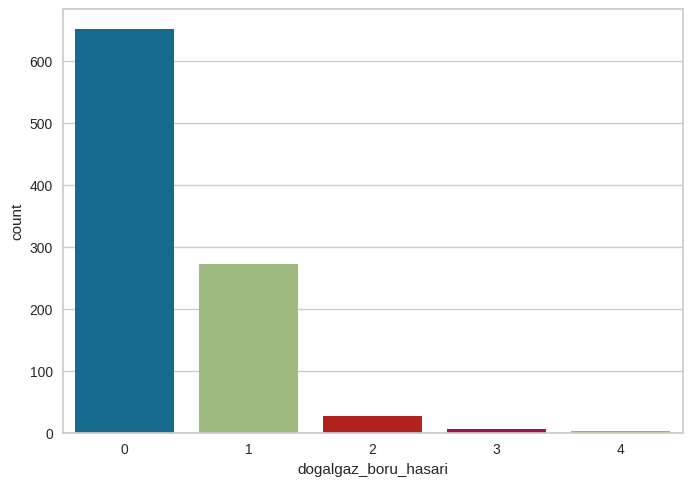

   icme_suyu_boru_hasari  Ratio
0                    591 61.627
1                    308 32.117
2                     42  4.380
3                     10  1.043
5                      4  0.417
4                      3  0.313
7                      1  0.104


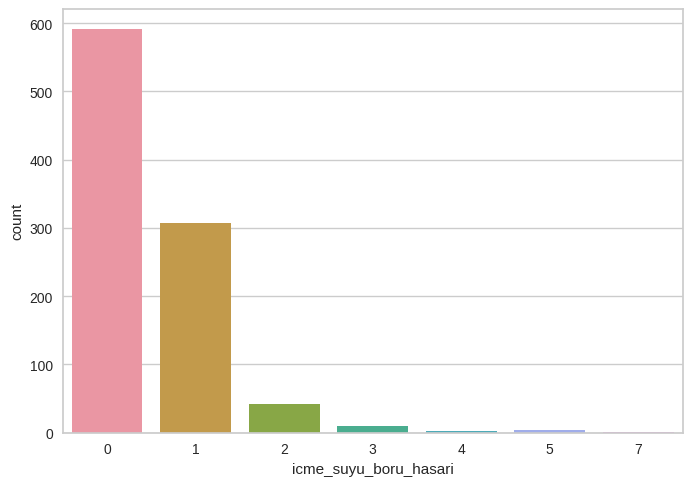

In [ ]:
for col in cat_cols:
  cat_summary(analiz_df, col,True)

#### 1.1.2. Sayısal Değişken Analizi

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")

count      959.000
mean     70155.975
std      57059.328
min      16634.000
5%       40179.900
10%      40227.800
20%      40323.600
30%      40484.400
40%      40581.200
50%      40677.000
60%      40784.200
70%      40901.600
80%      99130.400
90%     191795.400
95%     191901.200
99%     191981.840
max     192001.000
Name: mahalle_koy_uavt, dtype: float64


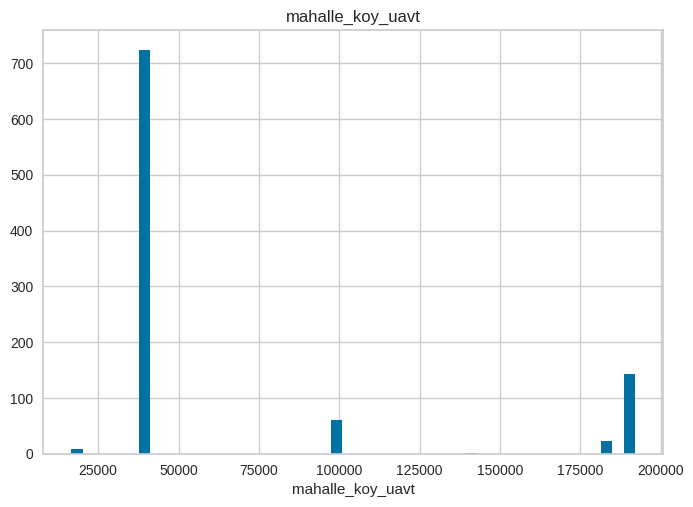

#####################################
count   959.000
mean     14.073
std      21.631
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       2.000
40%       4.000
50%       5.000
60%       8.000
70%      12.600
80%      22.000
90%      41.000
95%      60.100
99%     103.420
max     201.000
Name: cok_agir_hasarli_bina_sayisi, dtype: float64


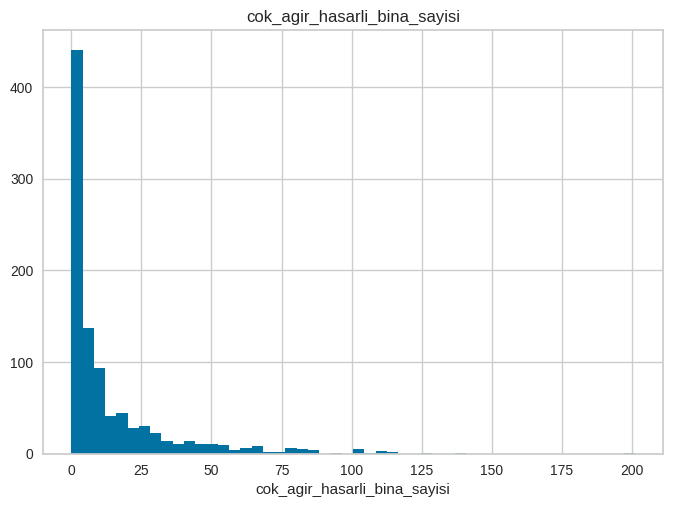

#####################################
count   959.000
mean     35.802
std      44.956
min       0.000
5%        1.000
10%       2.000
20%       5.000
30%       7.000
40%      13.000
50%      20.000
60%      26.000
70%      40.000
80%      57.000
90%      93.000
95%     130.200
99%     205.520
max     313.000
Name: agir_hasarli_bina_sayisi, dtype: float64


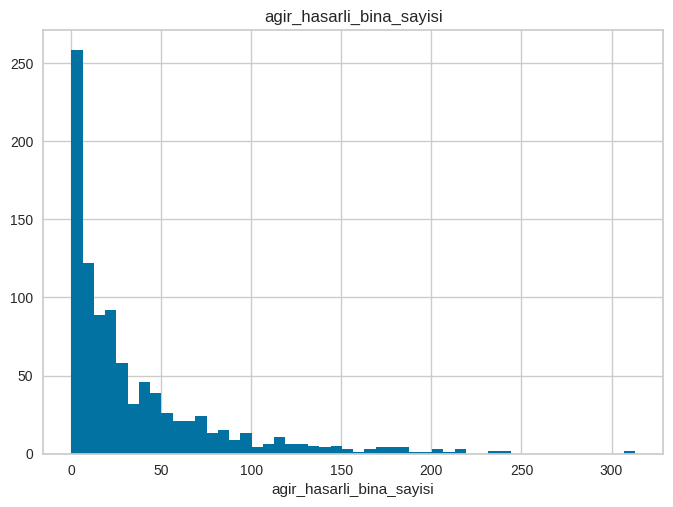

#####################################
count    959.000
mean     152.776
std      162.245
min        0.000
5%         8.000
10%       15.000
20%       28.000
30%       49.000
40%       69.000
50%      100.000
60%      136.800
70%      185.000
80%      249.400
90%      350.400
95%      483.000
99%      739.940
max     1565.000
Name: orta_hasarli_bina_sayisi, dtype: float64


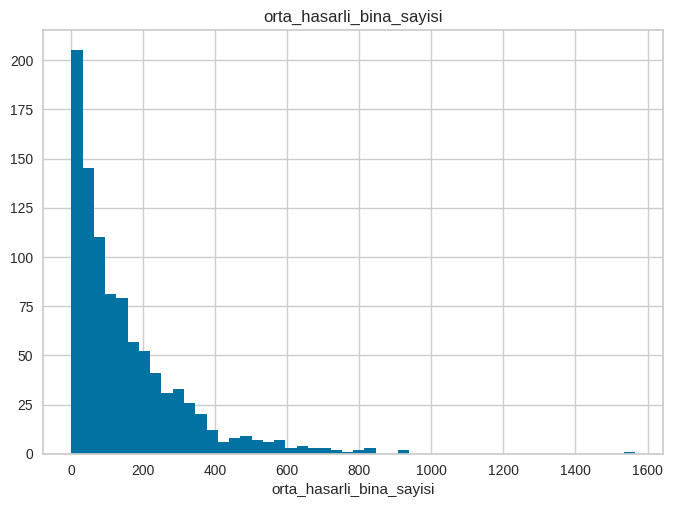

#####################################
count    959.000
mean     314.415
std      268.200
min        2.000
5%        26.000
10%       48.800
20%       92.600
30%      137.800
40%      190.000
50%      251.000
60%      320.800
70%      397.000
80%      492.000
90%      648.200
95%      796.500
99%     1242.300
max     2452.000
Name: hafif_hasarli_bina_sayisi, dtype: float64


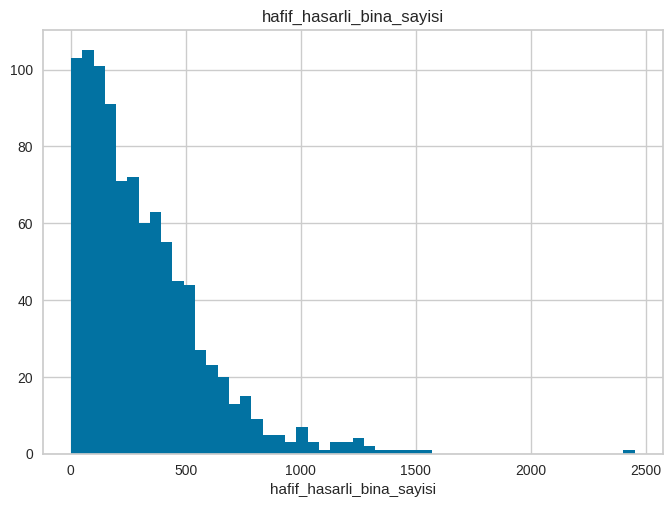

#####################################
count   959.000
mean     14.750
std      28.839
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       1.000
50%       3.000
60%       6.000
70%      10.000
80%      20.400
90%      47.000
95%      71.100
99%     143.420
max     230.000
Name: can_kaybi_sayisi, dtype: float64


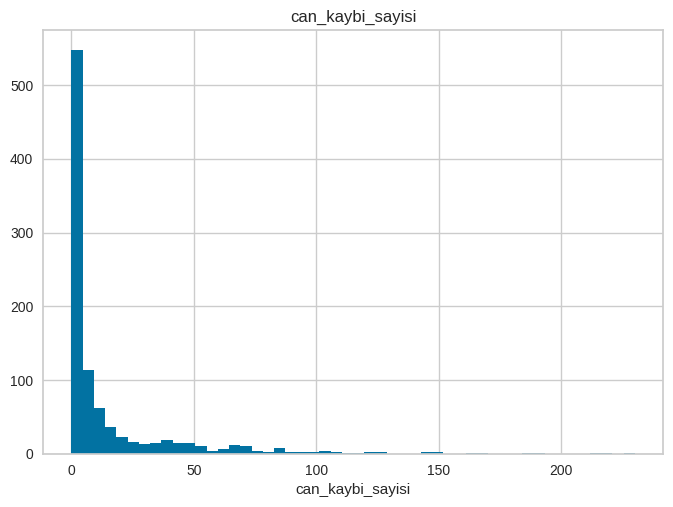

#####################################
count   959.000
mean      8.436
std      16.525
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%       1.000
60%       3.000
70%       6.000
80%      12.000
90%      28.000
95%      42.100
99%      83.840
max     122.000
Name: agir_yarali_sayisi, dtype: float64


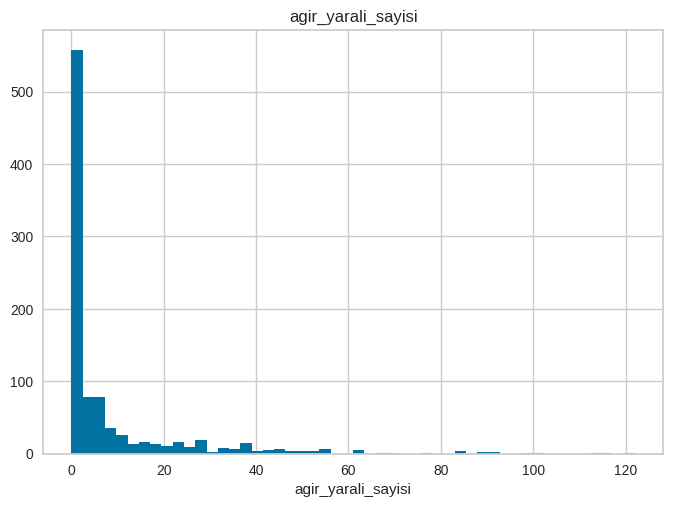

#####################################
count   959.000
mean     41.331
std      75.470
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       2.000
40%       5.000
50%      11.000
60%      19.000
70%      31.000
80%      60.400
90%     128.200
95%     191.100
99%     384.420
max     592.000
Name: hastanede_tedavi_sayisi, dtype: float64


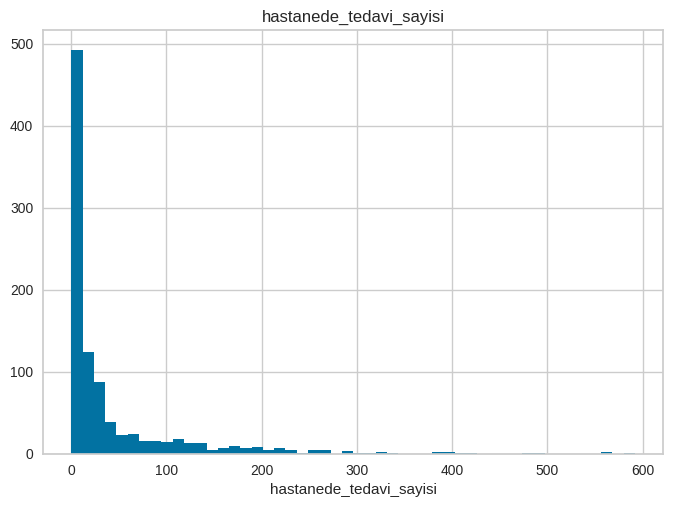

#####################################
count    959.000
mean      78.457
std      134.451
min        0.000
5%         0.000
10%        0.000
20%        1.000
30%        6.000
40%       14.000
50%       26.000
60%       42.000
70%       62.000
80%      114.000
90%      238.000
95%      358.200
99%      695.420
max     1028.000
Name: hafif_yarali_sayisi, dtype: float64


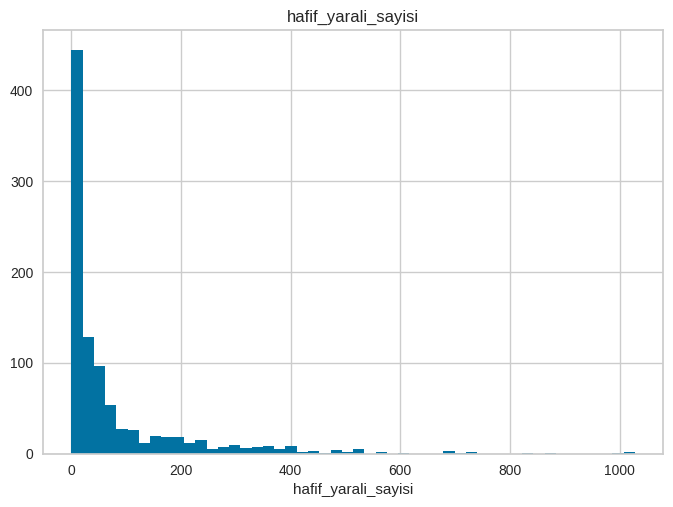

#####################################
count   959.000
mean      1.087
std       1.531
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       1.000
50%       1.000
60%       1.000
70%       1.000
80%       2.000
90%       2.000
95%       4.000
99%       7.000
max      14.000
Name: atik_su_boru_hasari, dtype: float64


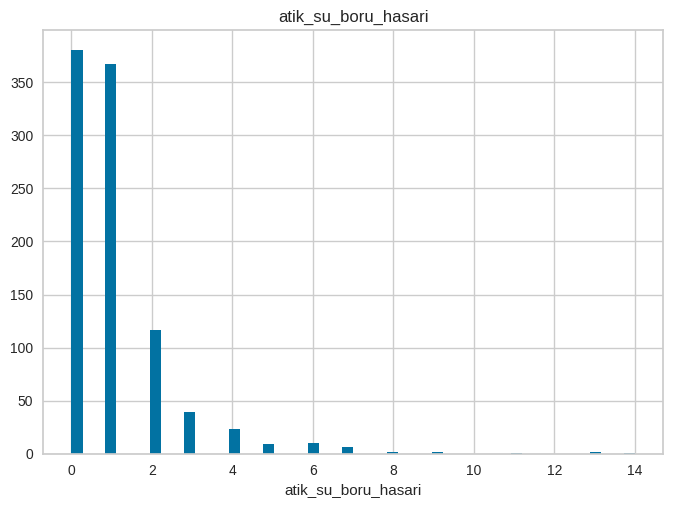

#####################################
count    959.000
mean     871.656
std     1195.256
min        0.000
5%         8.000
10%       16.000
20%       60.600
30%      140.000
40%      233.200
50%      412.000
60%      642.600
70%      943.800
80%     1412.800
90%     2384.000
95%     3268.700
99%     5987.100
max     9075.000
Name: gecici_barinma, dtype: float64


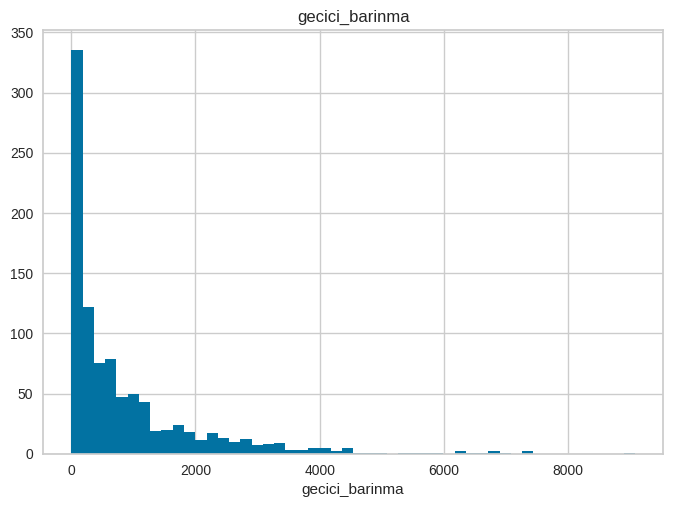

#####################################


In [ ]:
for col in num_cols:
  num_summary(analiz_df,col,True)

#### 1.1.3. Hedef Değişken Analizi

In [ ]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [ ]:
for col in cat_cols:
  target_summary_with_cat(analiz_df,"can_kaybi_sayisi",col)

                      TARGET_MEAN
dogalgaz_boru_hasari             
0                           5.796
1                          28.842
2                          69.704
3                          80.167
4                          54.667


                       TARGET_MEAN
icme_suyu_boru_hasari             
0                            4.359
1                           25.682
2                           60.119
3                           56.100
4                           97.000
5                           64.500
7                           24.000




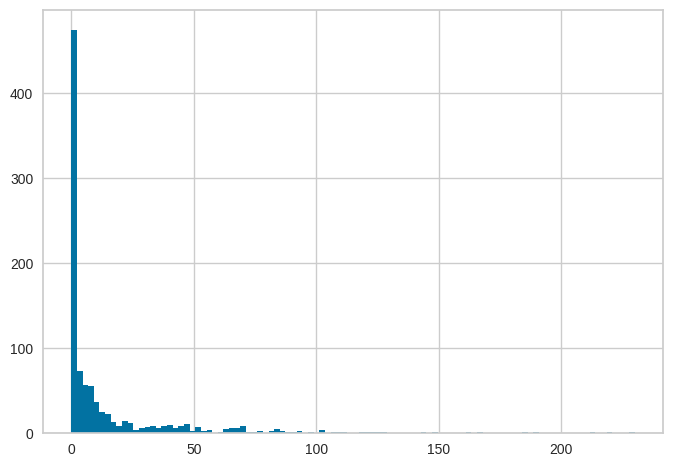

In [ ]:
# Bağımlı değişkenin incelenmesi
analiz_df["can_kaybi_sayisi"].hist(bins=100)
plt.show()

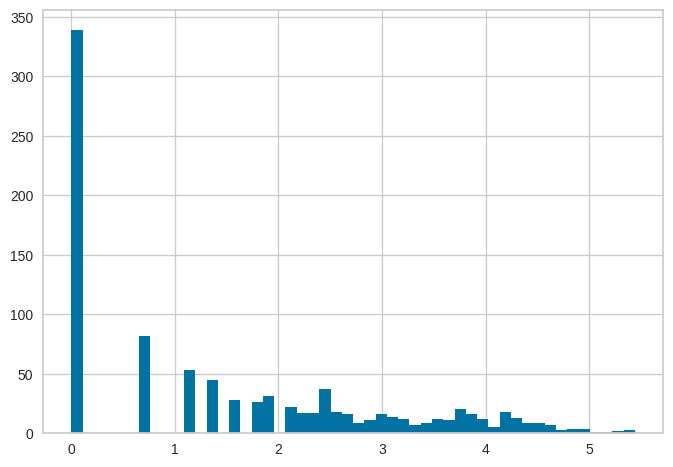

In [ ]:
# Bağımlı değişkenin logaritmasının incelenmesi
np.log1p(analiz_df['can_kaybi_sayisi']).hist(bins=50)
plt.show()

#### 1.1.4. Korelasyon Analizi

In [ ]:
corr = analiz_df[num_cols].corr()
corr

,mahalle_koy_uavt,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,atik_su_boru_hasari,gecici_barinma
mahalle_koy_uavt,1.000,-0.220,-0.265,-0.309,-0.368,-0.177,-0.174,-0.191,-0.203,-0.257,-0.246
cok_agir_hasarli_bina_sayisi,-0.220,1.000,0.912,0.764,0.593,0.831,0.866,0.835,0.828,0.635,0.735
agir_hasarli_bina_sayisi,-0.265,0.912,1.000,0.946,0.792,0.737,0.759,0.757,0.769,0.774,0.777
orta_hasarli_bina_sayisi,-0.309,0.764,0.946,1.000,0.929,0.652,0.657,0.680,0.707,0.769,0.788
hafif_hasarli_bina_sayisi,-0.368,0.593,0.792,0.929,1.000,0.558,0.553,0.591,0.627,0.674,0.755
can_kaybi_sayisi,-0.177,0.831,0.737,0.652,0.558,1.000,0.994,0.999,0.994,0.626,0.900
agir_yarali_sayisi,-0.174,0.866,0.759,0.657,0.553,0.994,1.000,0.992,0.986,0.609,0.886
hastanede_tedavi_sayisi,-0.191,0.835,0.757,0.680,0.591,0.999,0.992,1.000,0.998,0.651,0.917
hafif_yarali_sayisi,-0.203,0.828,0.769,0.707,0.627,0.994,0.986,0.998,1.000,0.670,0.936
atik_su_boru_hasari,-0.257,0.635,0.774,0.769,0.674,0.626,0.609,0.651,0.670,1.000,0.721


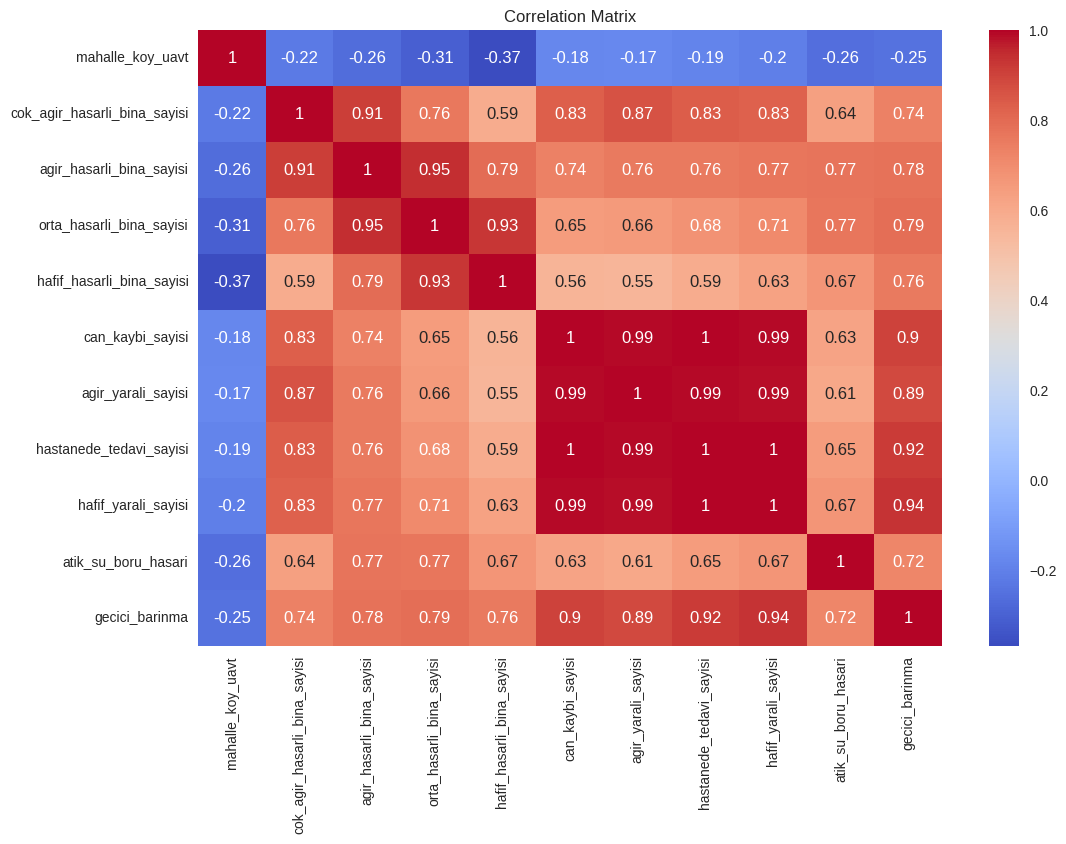

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Yüksek Korelasyonlu olanların bulunması için kullanılır.
# Bunları droplayıp droplamamayı daha sonra düşüneceğiz.
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

In [ ]:
high_correlated_cols(analiz_df, plot=False)

<ipython-input-97-3812e687d2fa>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


['agir_hasarli_bina_sayisi',
 'orta_hasarli_bina_sayisi',
 'hafif_hasarli_bina_sayisi',
 'can_kaybi_sayisi',
 'agir_yarali_sayisi',
 'hastanede_tedavi_sayisi',
 'hafif_yarali_sayisi',
 'dogalgaz_boru_hasari',
 'icme_suyu_boru_hasari',
 'atik_su_boru_hasari',
 'gecici_barinma']

### 1.2. bina_df

#### 1.2.0. Genel Giriş

In [ ]:
summarize(bina_df)

=========================== HEAD ===========================
  ilce_adi mahalle_adi  mahalle_uavt  1980_oncesi  1980-2000_arasi  2000_sonrasi  1-4 kat_arasi  5-9 kat_arasi  9-19 kat_arasi  mahalle_nufus
0   ADALAR   BURGAZADA     40139.000      433.000          214.000       173.000        802.000         18.000           0.000           1455
1   ADALAR  HEYBELÝADA     40142.000      836.000          347.000       212.000       1359.000         36.000           0.000           4158
2   ADALAR   KINALIADA     40143.000      610.000          244.000       158.000        923.000         89.000           0.000           1795
3   ADALAR       MADEN     40140.000      863.000          510.000       308.000       1637.000         44.000           0.000           4349
4   ADALAR       NÝZAM     40141.000      842.000          426.000       217.000       1434.000         51.000           0.000           3150
=========================== TAIL ===========================
        ilce_adi mahalle_a

In [ ]:
cat_cols, cat_but_car, num_cols = grab_col_names(bina_df)

Observations: 960
Variables: 10
cat_cols: 0
num_cols: 8
cat_but_car: 2
num_but_cat: 0


In [ ]:
print(f"Cat Col: {cat_cols}", end="\n\n")
print(f"cat_but_car: {cat_but_car}", end="\n\n")
print(f"num_cols: {num_cols}", end = "\n\n")

Cat Col: []

cat_but_car: ['ilce_adi', 'mahalle_adi']

num_cols: ['mahalle_uavt', '1980_oncesi', '1980-2000_arasi', '2000_sonrasi', '1-4 kat_arasi', '5-9 kat_arasi', '9-19 kat_arasi', 'mahalle_nufus']



#### 1.2.1. Kategorik Değişken Analizi

In [ ]:
for col in cat_cols:
  cat_summary(bina_df, col,True)

#### 1.2.2. Sayısal Değişken Analizi

count      959.000
mean     70155.975
std      57059.328
min      16634.000
5%       40179.900
10%      40227.800
20%      40323.600
30%      40484.400
40%      40581.200
50%      40677.000
60%      40784.200
70%      40901.600
80%      99130.400
90%     191795.400
95%     191901.200
99%     191981.840
max     192001.000
Name: mahalle_uavt, dtype: float64


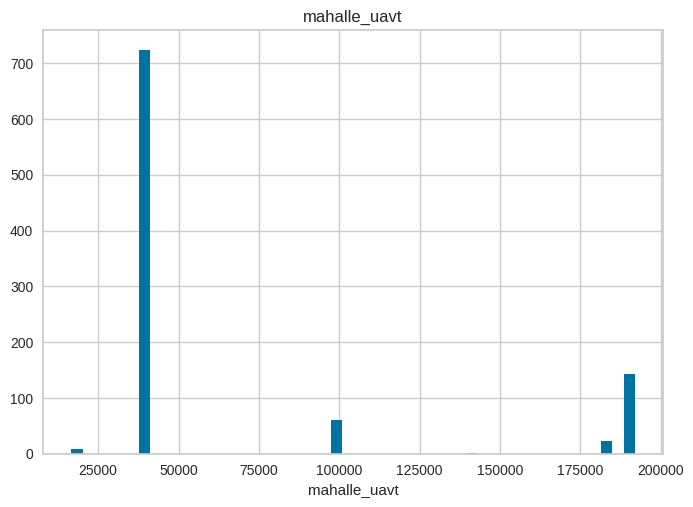

#####################################
count    959.000
mean     269.311
std      318.395
min        0.000
5%         0.000
10%        0.000
20%        3.000
30%       25.000
40%       84.600
50%      169.000
60%      249.800
70%      356.600
80%      490.400
90%      717.400
95%      903.100
99%     1393.700
max     2043.000
Name: 1980_oncesi, dtype: float64


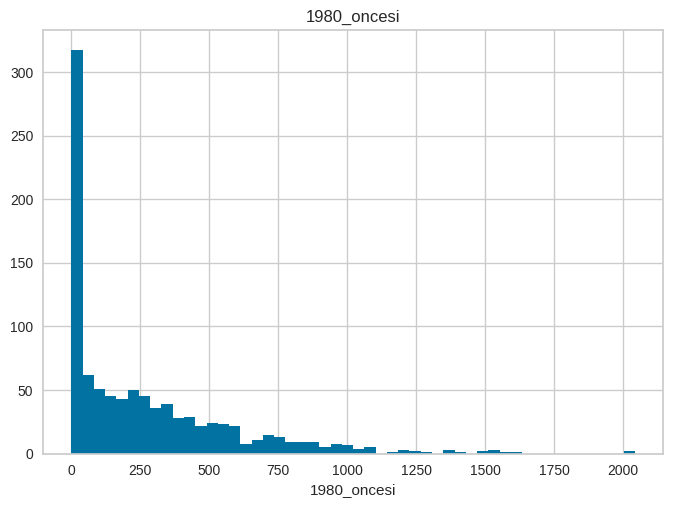

#####################################
count    959.000
mean     571.456
std      562.615
min        0.000
5%        39.900
10%       76.800
20%      140.600
30%      214.400
40%      292.400
50%      401.000
60%      525.600
70%      688.000
80%      882.600
90%     1309.800
95%     1666.200
99%     2712.600
max     4243.000
Name: 1980-2000_arasi, dtype: float64


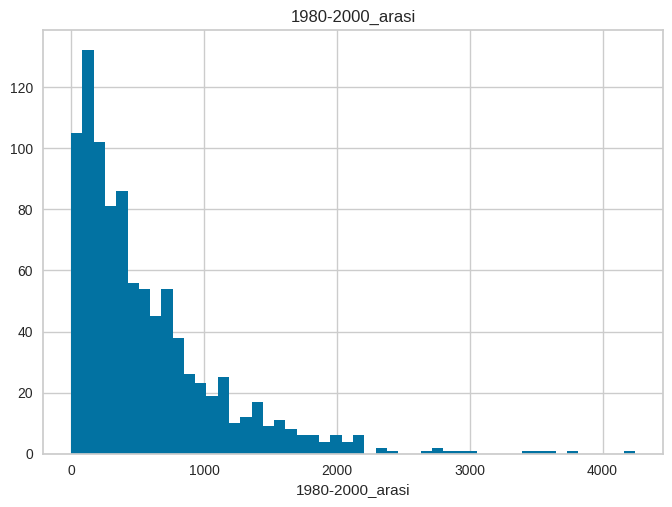

#####################################
count    959.000
mean     375.017
std      394.965
min        0.000
5%        16.000
10%       33.000
20%       85.200
30%      135.000
40%      200.200
50%      267.000
60%      353.000
70%      448.000
80%      602.000
90%      836.800
95%     1023.100
99%     1668.620
max     3875.000
Name: 2000_sonrasi, dtype: float64


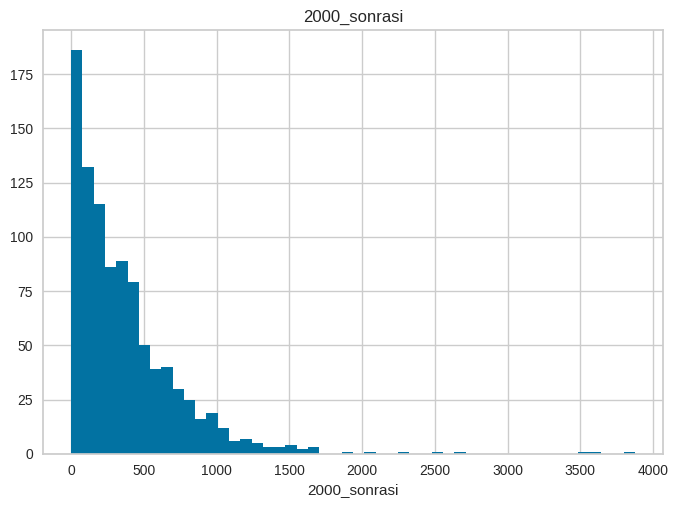

#####################################
count    959.000
mean     799.391
std      749.311
min        8.000
5%        98.000
10%      138.000
20%      242.200
30%      342.400
40%      465.000
50%      588.000
60%      765.600
70%      933.000
80%     1210.800
90%     1673.000
95%     2232.200
99%     3335.260
max     7362.000
Name: 1-4 kat_arasi, dtype: float64


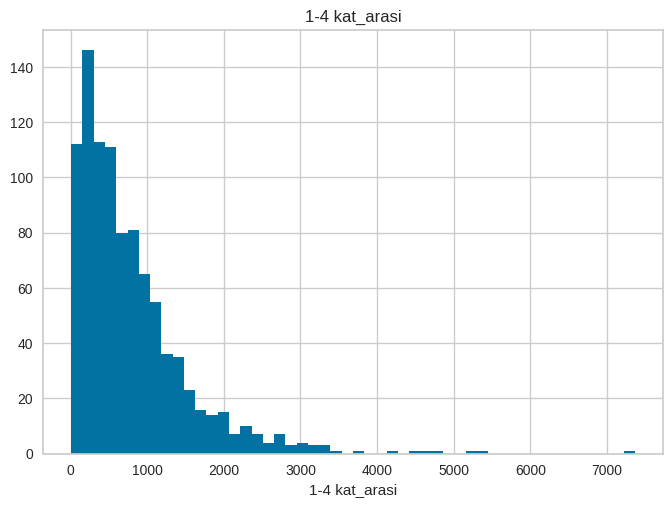

#####################################
count    959.000
mean     387.916
std      432.719
min        0.000
5%         0.000
10%        1.000
20%       15.000
30%       73.400
40%      165.200
50%      247.000
60%      364.800
70%      516.400
80%      678.400
90%      960.400
95%     1290.300
99%     1808.100
max     2789.000
Name: 5-9 kat_arasi, dtype: float64


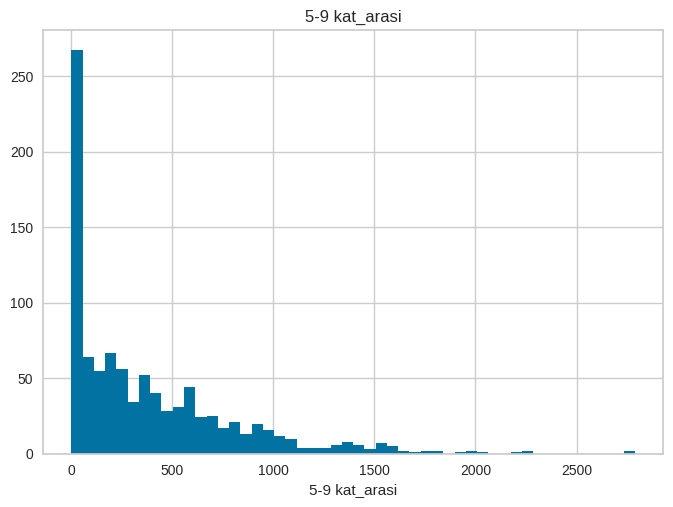

#####################################
count   959.000
mean     28.477
std      77.269
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       1.000
50%       3.000
60%       7.000
70%      15.000
80%      30.400
90%      67.400
95%     118.300
99%     441.360
max     789.000
Name: 9-19 kat_arasi, dtype: float64


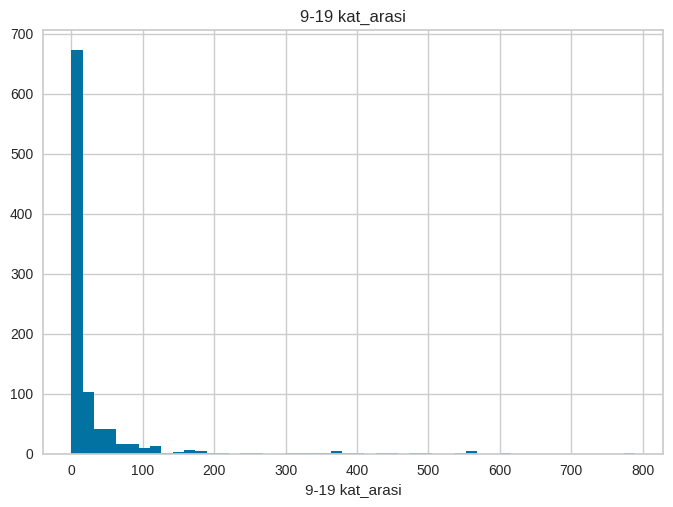

#####################################
count     960.000
mean    15655.434
std     15551.499
min        14.000
5%        230.500
10%       473.900
20%      1633.600
30%      4138.200
40%      8093.400
50%     12183.500
60%     16059.800
70%     20812.400
80%     26478.600
90%     34776.500
95%     45986.450
99%     72800.730
max     93229.000
Name: mahalle_nufus, dtype: float64


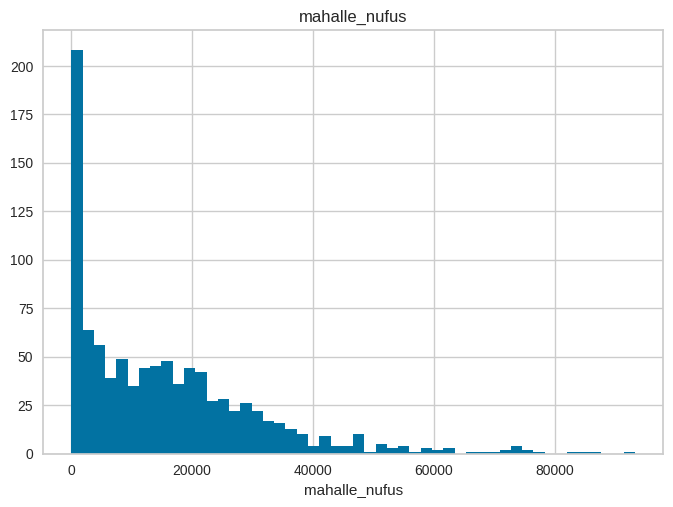

#####################################


In [ ]:
for col in num_cols:
  num_summary(bina_df,col,True)

#### 1.2.3. Hedef Değişken Analizi

Bu veri setini değişken türetmek için kullanacağız. O yüzden target değişkenimiz burada yok. Dosyayı mergledikten sonra tekrardan bakacağız.

In [ ]:
# for col in cat_cols:
#   target_summary_with_cat(bina_df,"can_kaybi_sayisi",col)

#### 1.2.4. Korelasyon Analizi

In [ ]:
corr = bina_df[num_cols].corr()
corr

,mahalle_uavt,1980_oncesi,1980-2000_arasi,2000_sonrasi,1-4 kat_arasi,5-9 kat_arasi,9-19 kat_arasi,mahalle_nufus
mahalle_uavt,1.000,-0.314,-0.268,-0.155,-0.205,-0.343,-0.131,-0.193
1980_oncesi,-0.314,1.000,0.077,-0.094,0.205,0.391,0.026,0.139
1980-2000_arasi,-0.268,0.077,1.000,0.504,0.750,0.511,0.037,0.290
2000_sonrasi,-0.155,-0.094,0.504,1.000,0.734,0.201,0.146,0.101
1-4 kat_arasi,-0.205,0.205,0.750,0.734,1.000,0.070,-0.033,0.054
5-9 kat_arasi,-0.343,0.391,0.511,0.201,0.070,1.000,0.078,0.441
9-19 kat_arasi,-0.131,0.026,0.037,0.146,-0.033,0.078,1.000,0.209
mahalle_nufus,-0.193,0.139,0.290,0.101,0.054,0.441,0.209,1.000


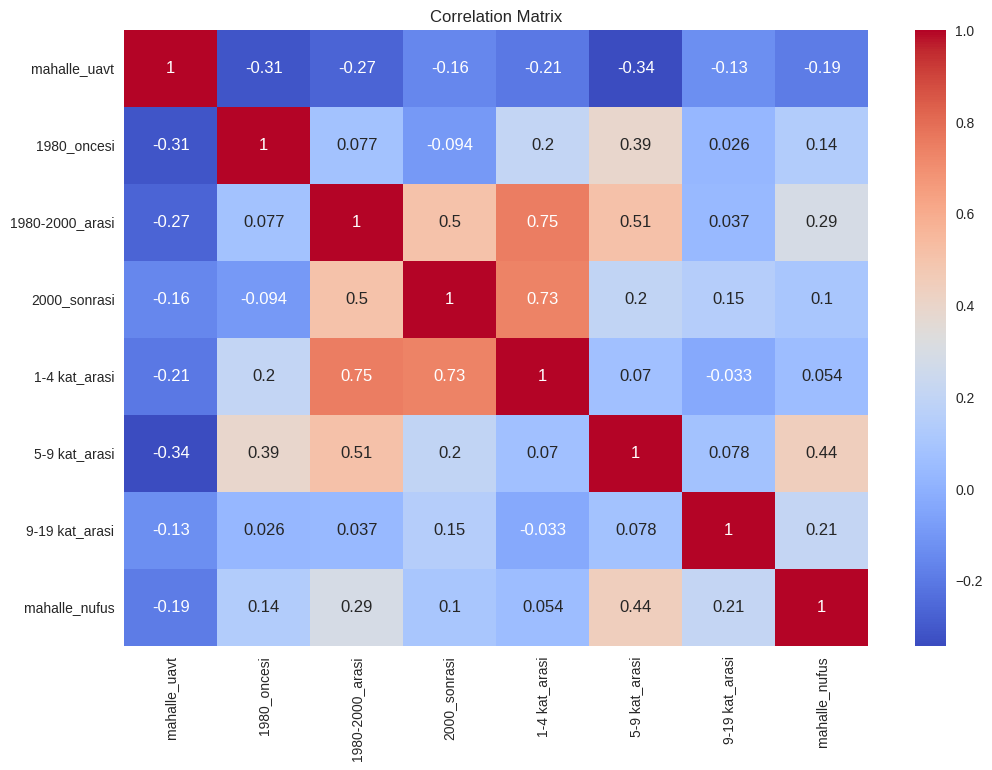

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Yüksek Korelasyonlu olanların bulunması için kullanılır.
# Bunları droplayıp droplamamayı daha sonra düşüneceğiz.
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

In [ ]:
high_correlated_cols(bina_df,False)

<ipython-input-107-3812e687d2fa>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


['1-4 kat_arasi']

## 1.3. Merged DF

### 1.3.0 Genel Giriş

In [ ]:
analiz_df.rename(columns={"mahalle_koy_uavt":"mahalle_uavt"},inplace = True)

In [ ]:
merged_df = pd.merge(analiz_df,bina_df,on=["ilce_adi","mahalle_uavt","mahalle_adi"],how="inner")

In [ ]:
merged_df.columns

Index(['ilce_adi', 'mahalle_adi', 'mahalle_uavt', 'cok_agir_hasarli_bina_sayisi', 'agir_hasarli_bina_sayisi', 'orta_hasarli_bina_sayisi', 'hafif_hasarli_bina_sayisi', 'can_kaybi_sayisi', 'agir_yarali_sayisi', 'hastanede_tedavi_sayisi', 'hafif_yarali_sayisi', 'dogalgaz_boru_hasari', 'icme_suyu_boru_hasari', 'atik_su_boru_hasari', 'gecici_barinma', '1980_oncesi', '1980-2000_arasi', '2000_sonrasi', '1-4 kat_arasi', '5-9 kat_arasi', '9-19 kat_arasi', 'mahalle_nufus'], dtype='object')

In [ ]:
summarize(merged_df)

=========================== HEAD ===========================
  ilce_adi mahalle_adi  mahalle_uavt  cok_agir_hasarli_bina_sayisi  agir_hasarli_bina_sayisi  orta_hasarli_bina_sayisi  hafif_hasarli_bina_sayisi  can_kaybi_sayisi  agir_yarali_sayisi  hastanede_tedavi_sayisi  hafif_yarali_sayisi  dogalgaz_boru_hasari  icme_suyu_boru_hasari  atik_su_boru_hasari  gecici_barinma  1980_oncesi  1980-2000_arasi  2000_sonrasi  1-4 kat_arasi  5-9 kat_arasi  9-19 kat_arasi  mahalle_nufus
0   ADALAR   BURGAZADA         40139                            54                        99                       256                        241                 8                   6                       24                   42                     0                      0                    1             398      433.000          214.000       173.000        802.000         18.000           0.000           1455
1   ADALAR  HEYBELÝADA         40142                           101                       175             

In [ ]:
cat_cols, cat_but_car, num_cols = grab_col_names(merged_df)

Observations: 956
Variables: 22
cat_cols: 2
num_cols: 18
cat_but_car: 2
num_but_cat: 2


In [ ]:
print(f"Cat Col: {cat_cols}", end="\n\n")
print(f"cat_but_car: {cat_but_car}", end="\n\n")
print(f"num_cols: {num_cols}", end = "\n\n")

Cat Col: ['dogalgaz_boru_hasari', 'icme_suyu_boru_hasari']

cat_but_car: ['ilce_adi', 'mahalle_adi']

num_cols: ['mahalle_uavt', 'cok_agir_hasarli_bina_sayisi', 'agir_hasarli_bina_sayisi', 'orta_hasarli_bina_sayisi', 'hafif_hasarli_bina_sayisi', 'can_kaybi_sayisi', 'agir_yarali_sayisi', 'hastanede_tedavi_sayisi', 'hafif_yarali_sayisi', 'atik_su_boru_hasari', 'gecici_barinma', '1980_oncesi', '1980-2000_arasi', '2000_sonrasi', '1-4 kat_arasi', '5-9 kat_arasi', '9-19 kat_arasi', 'mahalle_nufus']



### 1.3.1. Kategorik Değişken Analizi

   dogalgaz_boru_hasari  Ratio
0                   649 67.887
1                   271 28.347
2                    27  2.824
3                     6  0.628
4                     3  0.314


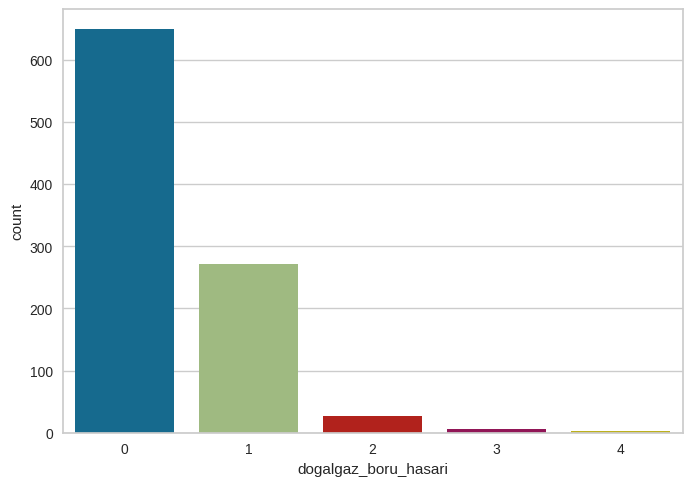

   icme_suyu_boru_hasari  Ratio
0                    590 61.715
1                    306 32.008
2                     42  4.393
3                     10  1.046
5                      4  0.418
4                      3  0.314
7                      1  0.105


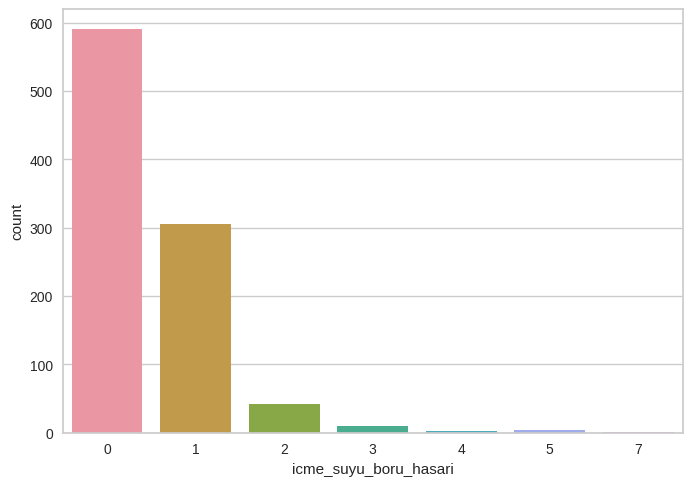

In [ ]:
for col in cat_cols:
  cat_summary(merged_df, col,True)

### 1.3.2. Sayısal Değişken Analizi

count      956.000
mean     70248.449
std      57124.933
min      16634.000
5%       40179.750
10%      40227.500
20%      40323.000
30%      40483.500
40%      40581.000
50%      40676.500
60%      40785.000
70%      40902.500
80%      99131.000
90%     191796.000
95%     191901.500
99%     191981.900
max     192001.000
Name: mahalle_uavt, dtype: float64


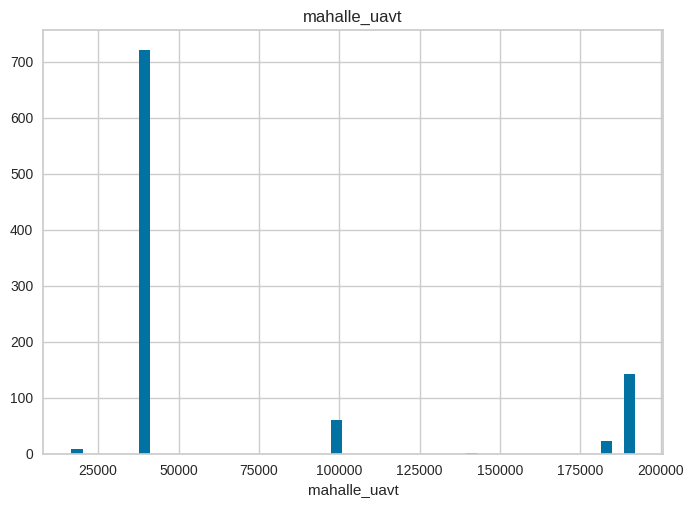

#####################################
count   956.000
mean     14.098
std      21.658
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       2.000
40%       4.000
50%       5.000
60%       8.000
70%      12.500
80%      22.000
90%      41.000
95%      60.250
99%     103.450
max     201.000
Name: cok_agir_hasarli_bina_sayisi, dtype: float64


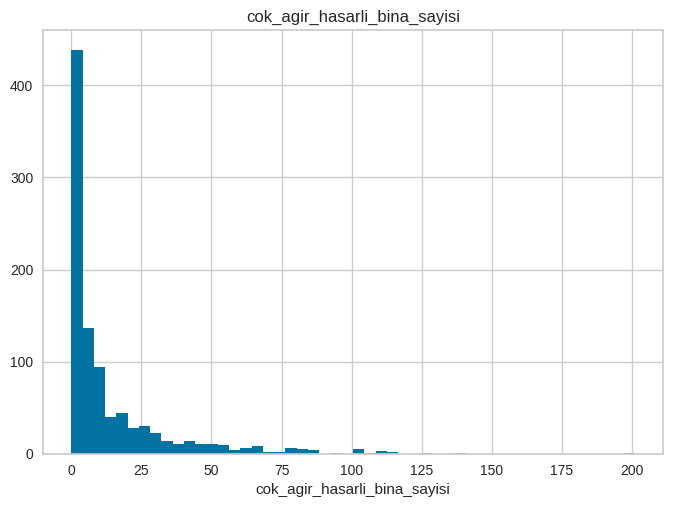

#####################################
count   956.000
mean     35.863
std      45.006
min       0.000
5%        1.000
10%       2.000
20%       5.000
30%       7.000
40%      13.000
50%      20.000
60%      26.000
70%      40.000
80%      57.000
90%      93.000
95%     130.500
99%     205.700
max     313.000
Name: agir_hasarli_bina_sayisi, dtype: float64


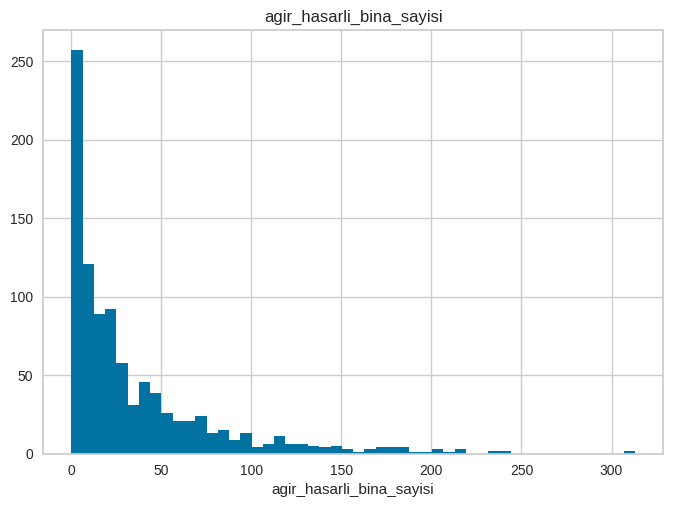

#####################################
count    956.000
mean     153.041
std      162.406
min        0.000
5%         8.000
10%       15.000
20%       28.000
30%       49.000
40%       69.000
50%      100.500
60%      137.000
70%      185.000
80%      250.000
90%      351.000
95%      483.000
99%      740.150
max     1565.000
Name: orta_hasarli_bina_sayisi, dtype: float64


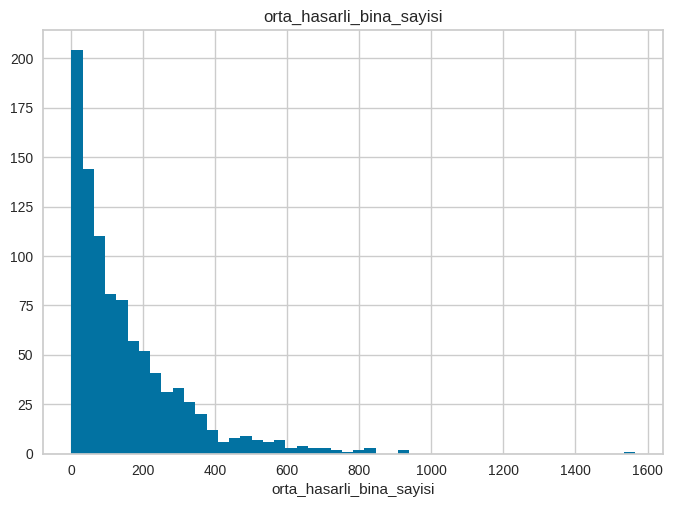

#####################################
count    956.000
mean     314.834
std      268.509
min        2.000
5%        26.000
10%       48.500
20%       92.000
30%      138.000
40%      190.000
50%      252.500
60%      322.000
70%      397.000
80%      492.000
90%      648.500
95%      797.250
99%     1242.750
max     2452.000
Name: hafif_hasarli_bina_sayisi, dtype: float64


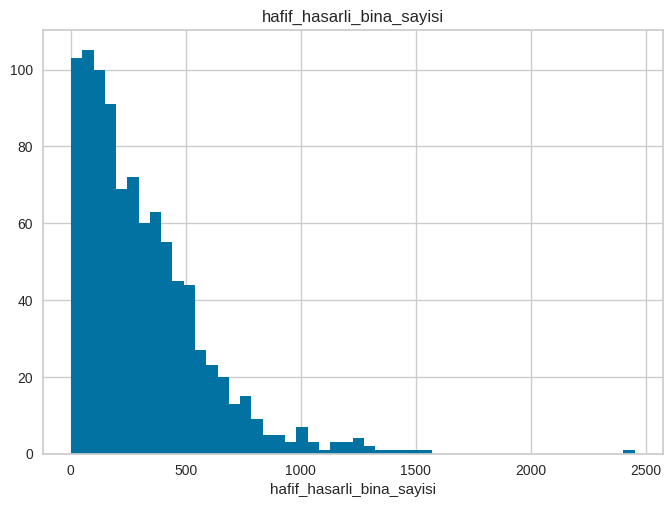

#####################################
count   956.000
mean     14.775
std      28.879
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       1.000
50%       3.000
60%       6.000
70%      10.000
80%      21.000
90%      47.000
95%      71.250
99%     143.450
max     230.000
Name: can_kaybi_sayisi, dtype: float64


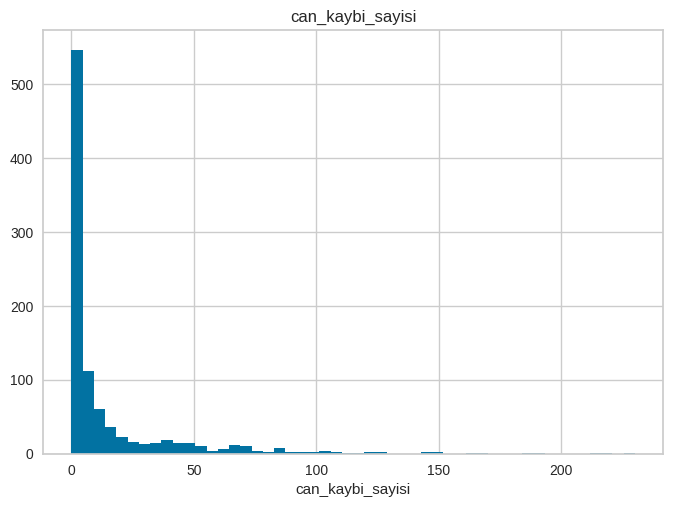

#####################################
count   956.000
mean      8.452
std      16.548
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%       1.000
60%       3.000
70%       6.000
80%      12.000
90%      28.000
95%      42.250
99%      83.900
max     122.000
Name: agir_yarali_sayisi, dtype: float64


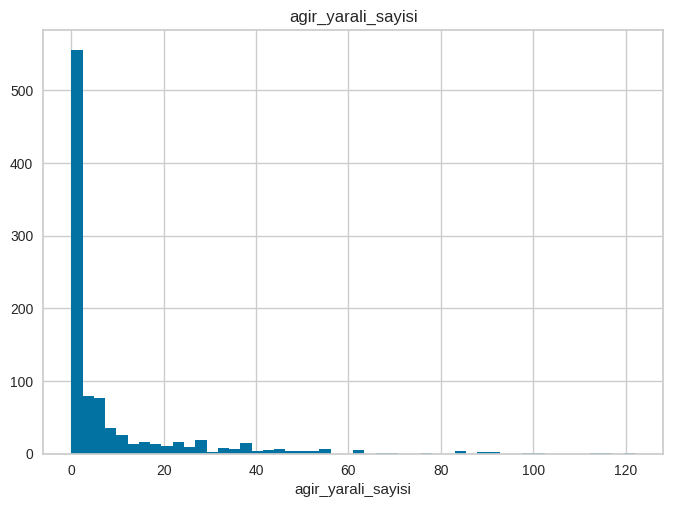

#####################################
count   956.000
mean     41.397
std      75.576
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       2.000
40%       5.000
50%      11.000
60%      19.000
70%      31.000
80%      61.000
90%     128.500
95%     191.250
99%     384.450
max     592.000
Name: hastanede_tedavi_sayisi, dtype: float64


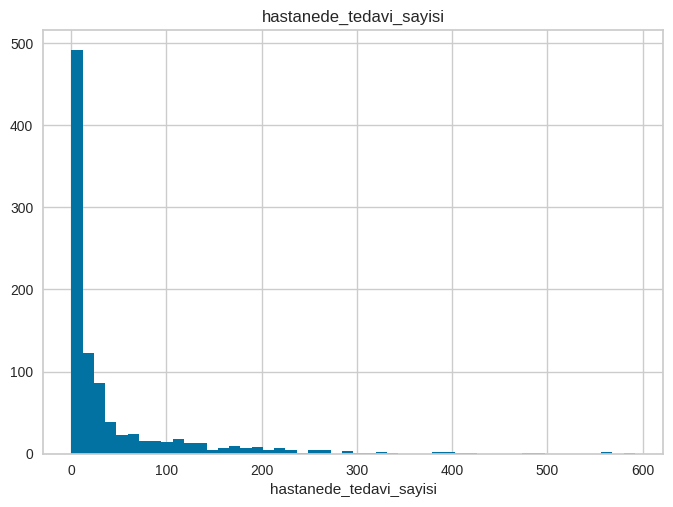

#####################################
count    956.000
mean      78.578
std      134.639
min        0.000
5%         0.000
10%        0.000
20%        1.000
30%        6.000
40%       14.000
50%       26.000
60%       42.000
70%       62.000
80%      114.000
90%      238.000
95%      358.500
99%      695.450
max     1028.000
Name: hafif_yarali_sayisi, dtype: float64


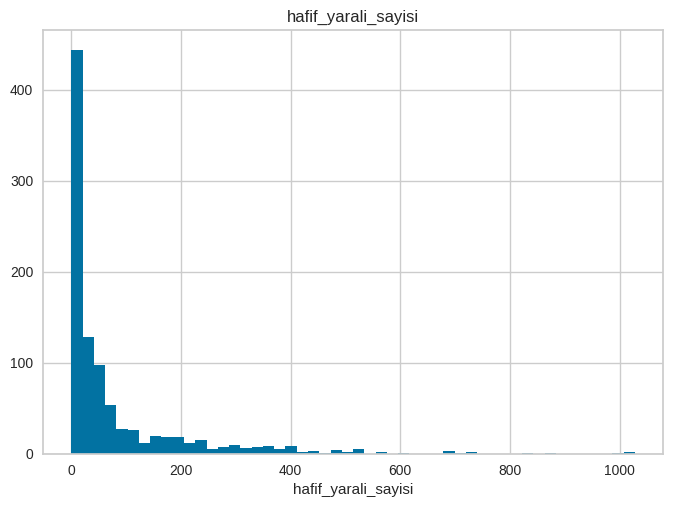

#####################################
count   956.000
mean      1.087
std       1.533
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       1.000
50%       1.000
60%       1.000
70%       1.000
80%       2.000
90%       2.000
95%       4.000
99%       7.000
max      14.000
Name: atik_su_boru_hasari, dtype: float64


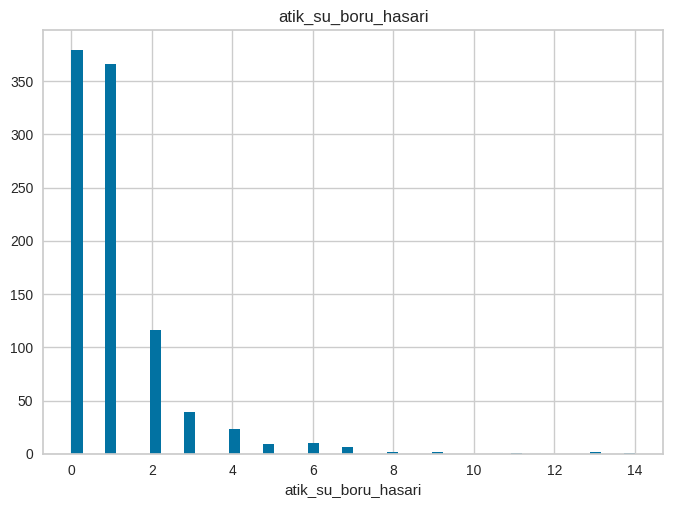

#####################################
count    956.000
mean     872.880
std     1196.832
min        0.000
5%         8.000
10%       16.000
20%       60.000
30%      139.500
40%      233.000
50%      411.000
60%      643.000
70%      945.500
80%     1423.000
90%     2390.000
95%     3271.250
99%     5997.750
max     9075.000
Name: gecici_barinma, dtype: float64


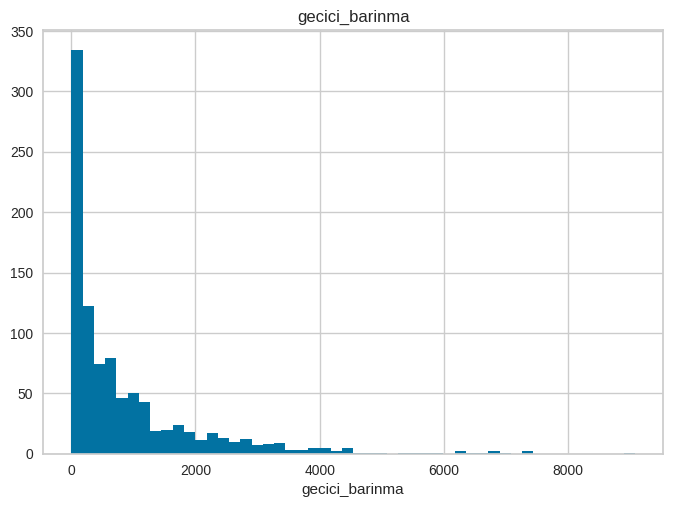

#####################################
count    956.000
mean     269.428
std      318.811
min        0.000
5%         0.000
10%        0.000
20%        3.000
30%       25.000
40%       84.000
50%      169.000
60%      250.000
70%      356.500
80%      491.000
90%      718.000
95%      903.250
99%     1394.750
max     2043.000
Name: 1980_oncesi, dtype: float64


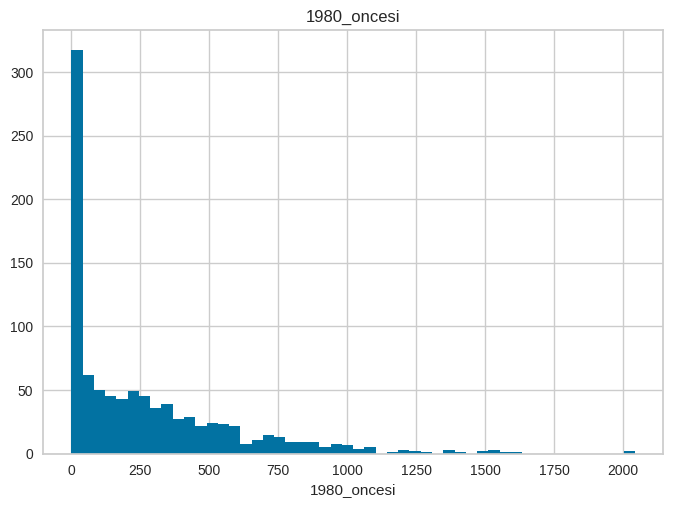

#####################################
count    956.000
mean     572.359
std      563.245
min        0.000
5%        39.750
10%       76.500
20%      140.000
30%      214.500
40%      294.000
50%      402.500
60%      526.000
70%      691.500
80%      885.000
90%     1312.500
95%     1666.500
99%     2713.500
max     4243.000
Name: 1980-2000_arasi, dtype: float64


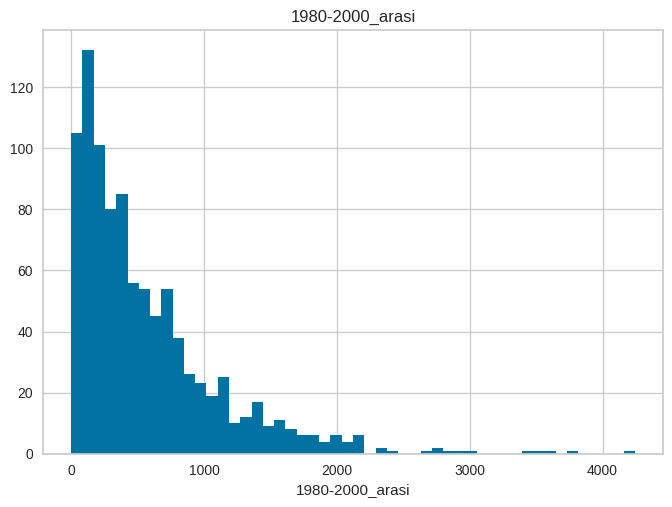

#####################################
count    956.000
mean     375.506
std      395.428
min        0.000
5%        16.000
10%       33.000
20%       86.000
30%      135.000
40%      200.000
50%      267.000
60%      354.000
70%      449.000
80%      602.000
90%      838.000
95%     1023.250
99%     1668.950
max     3875.000
Name: 2000_sonrasi, dtype: float64


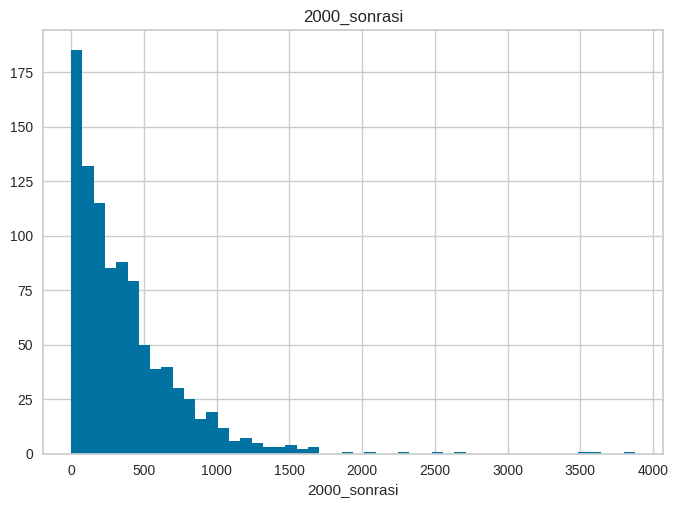

#####################################
count    956.000
mean     801.100
std      749.822
min        8.000
5%        99.500
10%      140.500
20%      243.000
30%      343.000
40%      469.000
50%      593.000
60%      767.000
70%      935.500
80%     1212.000
90%     1673.000
95%     2234.000
99%     3336.850
max     7362.000
Name: 1-4 kat_arasi, dtype: float64


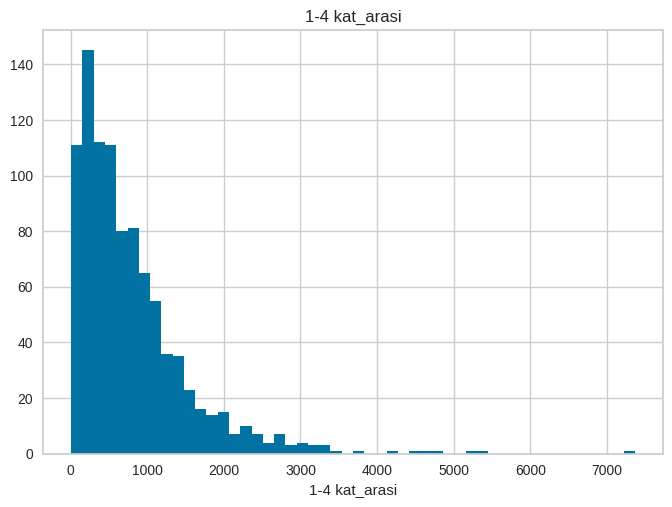

#####################################
count    956.000
mean     388.113
std      433.345
min        0.000
5%         0.000
10%        1.000
20%       15.000
30%       72.500
40%      162.000
50%      245.000
60%      365.000
70%      518.500
80%      679.000
90%      961.000
95%     1292.250
99%     1809.750
max     2789.000
Name: 5-9 kat_arasi, dtype: float64


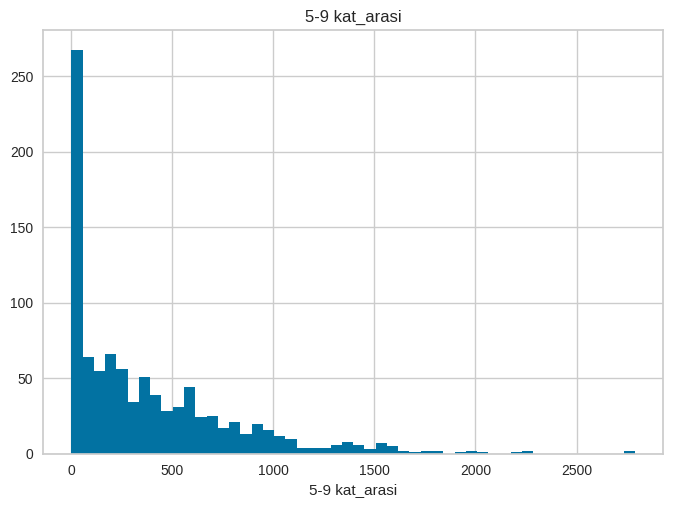

#####################################
count   956.000
mean     28.079
std      76.587
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       1.000
50%       3.000
60%       7.000
70%      15.000
80%      29.000
90%      66.000
95%     118.000
99%     441.600
max     789.000
Name: 9-19 kat_arasi, dtype: float64


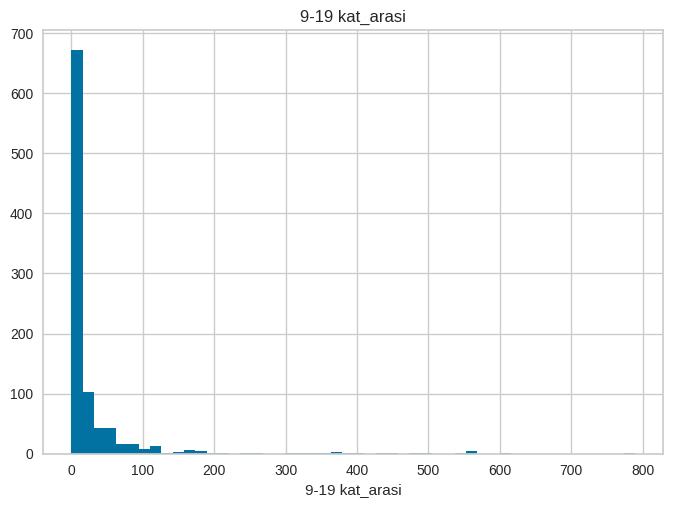

#####################################
count     956.000
mean    15638.922
std     15570.378
min        14.000
5%        228.500
10%       469.500
20%      1624.000
30%      4082.500
40%      8091.000
50%     12165.000
60%     15987.000
70%     20778.000
80%     26464.000
90%     34834.500
95%     46164.250
99%     72806.850
max     93229.000
Name: mahalle_nufus, dtype: float64


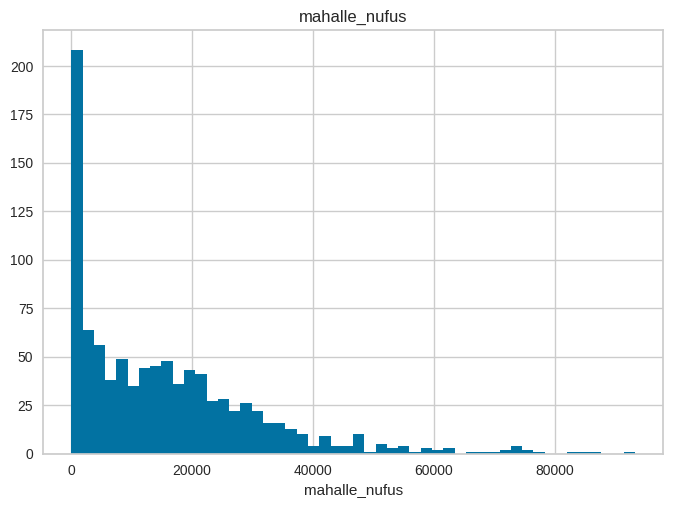

#####################################


In [ ]:
for col in num_cols:
  num_summary(merged_df,col,True)

### 1.3.3. Hedef Değişken Analizi

In [ ]:
for col in cat_cols:
  target_summary_with_cat(merged_df,"can_kaybi_sayisi",col)

                      TARGET_MEAN
dogalgaz_boru_hasari             
0                           5.803
1                          28.900
2                          69.704
3                          80.167
4                          54.667


                       TARGET_MEAN
icme_suyu_boru_hasari             
0                            4.363
1                           25.791
2                           60.119
3                           56.100
4                           97.000
5                           64.500
7                           24.000




### 1.3.4. Korelasyon Analizi

In [ ]:
corr = merged_df[num_cols].corr()
corr

,mahalle_uavt,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,atik_su_boru_hasari,gecici_barinma,1980_oncesi,1980-2000_arasi,2000_sonrasi,1-4 kat_arasi,5-9 kat_arasi,9-19 kat_arasi,mahalle_nufus
mahalle_uavt,1.000,-0.220,-0.266,-0.310,-0.369,-0.178,-0.174,-0.191,-0.204,-0.258,-0.246,-0.314,-0.269,-0.156,-0.207,-0.343,-0.130,-0.193
cok_agir_hasarli_bina_sayisi,-0.220,1.000,0.912,0.764,0.593,0.831,0.866,0.835,0.828,0.635,0.735,0.415,0.285,0.077,0.184,0.434,-0.035,0.234
agir_hasarli_bina_sayisi,-0.266,0.912,1.000,0.946,0.792,0.737,0.759,0.757,0.769,0.775,0.777,0.321,0.512,0.348,0.457,0.430,-0.005,0.277
orta_hasarli_bina_sayisi,-0.310,0.764,0.946,1.000,0.929,0.652,0.657,0.680,0.707,0.769,0.788,0.282,0.694,0.519,0.615,0.515,0.019,0.337
hafif_hasarli_bina_sayisi,-0.369,0.593,0.792,0.929,1.000,0.558,0.553,0.591,0.627,0.674,0.755,0.350,0.819,0.593,0.666,0.692,0.101,0.396
can_kaybi_sayisi,-0.178,0.831,0.737,0.652,0.558,1.000,0.994,0.999,0.994,0.626,0.900,0.270,0.275,0.021,-0.008,0.582,0.043,0.390
agir_yarali_sayisi,-0.174,0.866,0.759,0.657,0.553,0.994,1.000,0.992,0.986,0.609,0.886,0.307,0.260,0.008,0.003,0.561,0.021,0.365
hastanede_tedavi_sayisi,-0.191,0.835,0.757,0.680,0.591,0.999,0.992,1.000,0.998,0.651,0.917,0.272,0.309,0.050,0.024,0.596,0.056,0.402
hafif_yarali_sayisi,-0.204,0.828,0.769,0.707,0.627,0.994,0.986,0.998,1.000,0.670,0.936,0.269,0.347,0.082,0.054,0.619,0.066,0.419
atik_su_boru_hasari,-0.258,0.635,0.775,0.769,0.674,0.626,0.609,0.651,0.670,1.000,0.721,0.084,0.475,0.423,0.365,0.406,0.162,0.303


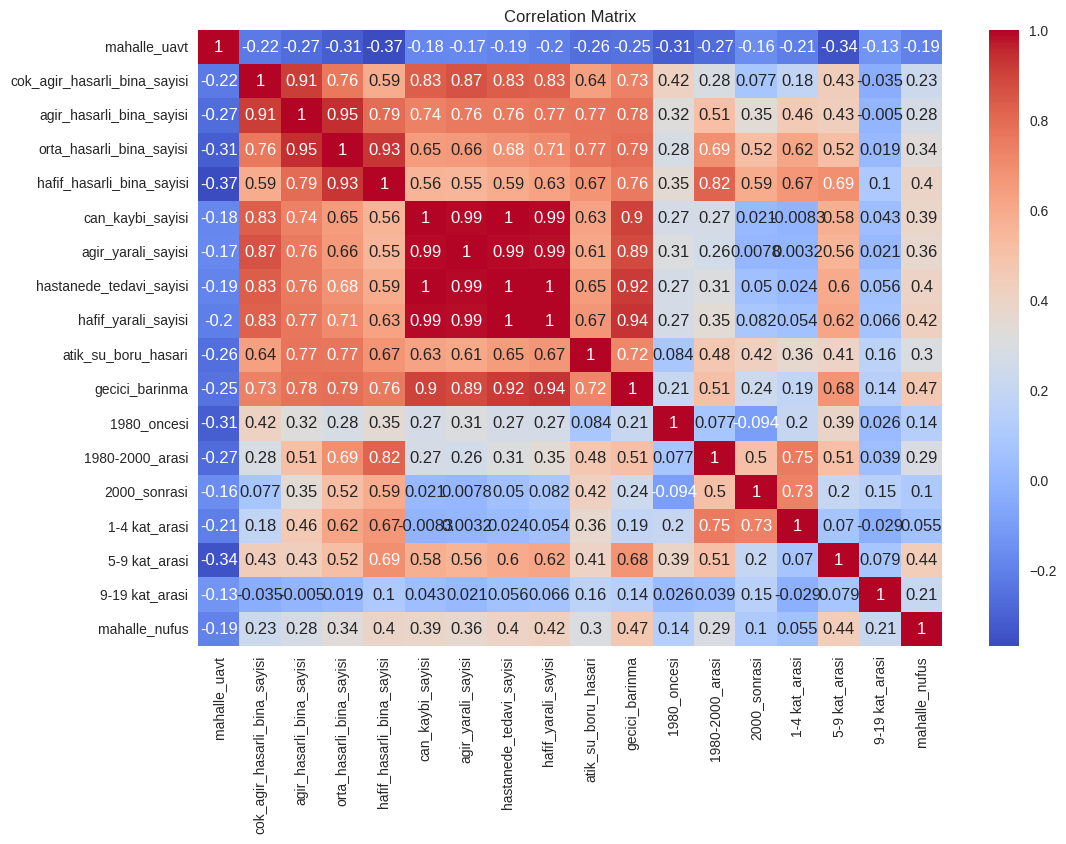

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Yüksek Korelasyonlu olanların bulunması için kullanılır.
# Bunları droplayıp droplamamayı daha sonra düşüneceğiz.
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

In [ ]:
high_correlated_cols(merged_df,False)

<ipython-input-120-3812e687d2fa>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


['agir_hasarli_bina_sayisi',
 'orta_hasarli_bina_sayisi',
 'hafif_hasarli_bina_sayisi',
 'can_kaybi_sayisi',
 'agir_yarali_sayisi',
 'hastanede_tedavi_sayisi',
 'hafif_yarali_sayisi',
 'dogalgaz_boru_hasari',
 'icme_suyu_boru_hasari',
 'atik_su_boru_hasari',
 'gecici_barinma',
 '1980-2000_arasi',
 '1-4 kat_arasi']

# 2. Feature Engineering

## 2.1. Aykırı Değer Analizi

In [ ]:
# Aykırı değerlerin baskılanması
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
# Aykırı değer kontrolü
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    if col != "can_kaybi_sayisi":
      print(col, check_outlier(merged_df, col))

mahalle_uavt False
cok_agir_hasarli_bina_sayisi True
agir_hasarli_bina_sayisi True
orta_hasarli_bina_sayisi True
hafif_hasarli_bina_sayisi True
agir_yarali_sayisi True
hastanede_tedavi_sayisi True
hafif_yarali_sayisi True
atik_su_boru_hasari True
gecici_barinma True
1980_oncesi True
1980-2000_arasi True
2000_sonrasi True
1-4 kat_arasi True
5-9 kat_arasi True
9-19 kat_arasi True
mahalle_nufus True


In [ ]:
# Aykırı değerlerin baskılanması
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
# for col in num_cols:
#     if col != "can_kaybi_sayisi":
#       replace_with_threshold(merged_df, col)

## 2.2. Eksik Değer Analizi

Bu veri setinde eksik değer yok (analiz raporu olduğu için). Fakat yinede buraya fonksiyonları yazmakta fayda var. İleride farklı şeyleri deneyebiliriz.

In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns


In [ ]:
missing_values_table(merged_df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [ ]:
# Bu fonsksiyon eksik değerlerin median veya mean ile doldurulmasını sağlar

def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Eksik değere sahip olan değişkenler listelenir

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Uygulama öncesi değişkenlerin eksik değerlerinin sayısı

    # değişken object ve sınıf sayısı cat_lengthe eşit veya altındaysa boş değerleri mode ile doldur
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    # num_method mean ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # num_method median ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data

In [ ]:
# df = quick_missing_imp(df, num_method="median", cat_length=17)

## 2.3. Rare Analizi ve Rare Encoding

In [ ]:
# Kategorik kolonların dağılımının incelenmesi
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [ ]:
rare_analyser(merged_df, "can_kaybi_sayisi", cat_cols)

dogalgaz_boru_hasari : 5
   COUNT  RATIO  TARGET_MEAN
0    649  0.679        5.803
1    271  0.283       28.900
2     27  0.028       69.704
3      6  0.006       80.167
4      3  0.003       54.667


icme_suyu_boru_hasari : 7
   COUNT  RATIO  TARGET_MEAN
0    590  0.617        4.363
1    306  0.320       25.791
2     42  0.044       60.119
3     10  0.010       56.100
4      3  0.003       97.000
5      4  0.004       64.500
7      1  0.001       24.000




In [ ]:
# Nadir sınıfların tespit edilmesi
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [ ]:
rare_encoder(merged_df,0.01)

,ilce_adi,mahalle_adi,mahalle_uavt,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma,1980_oncesi,1980-2000_arasi,2000_sonrasi,1-4 kat_arasi,5-9 kat_arasi,9-19 kat_arasi,mahalle_nufus
0,Rare,Rare,40139,54,99,256,241,8,6,24,42,0,0,1,398,433.000,214.000,173.000,802.000,18.000,0.000,1455
1,Rare,Rare,40142,101,175,423,393,25,21,66,113,1,1,2,763,836.000,347.000,212.000,1359.000,36.000,0.000,4158
2,Rare,Rare,40143,53,97,287,302,5,3,15,27,0,1,1,420,610.000,244.000,158.000,923.000,89.000,0.000,1795
3,Rare,Rare,40140,104,192,483,484,22,18,64,113,1,1,2,847,863.000,510.000,308.000,1637.000,44.000,0.000,4349
4,Rare,Rare,40141,101,180,445,422,16,13,48,83,1,2,2,687,842.000,426.000,217.000,1434.000,51.000,0.000,3150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,ZEYTÝNBURNU,Rare,40831,41,80,319,561,87,47,229,414,1,1,3,5682,53.000,1025.000,223.000,252.000,989.000,60.000,24113
952,ZEYTÝNBURNU,Rare,40839,72,133,470,801,84,48,223,400,1,1,3,1094,567.000,763.000,710.000,596.000,1443.000,1.000,36848
953,ZEYTÝNBURNU,Rare,40836,39,80,309,530,66,38,175,317,1,1,2,3400,92.000,1020.000,185.000,418.000,879.000,0.000,37515
954,ZEYTÝNBURNU,Rare,40833,17,33,135,234,24,13,63,114,0,0,1,1715,31.000,450.000,67.000,109.000,438.000,1.000,27737


## 2.4. Feature Extraction

####TO DO:
* Sayısal değişkenleri dağılımlarına göre  Kategorik verilere dönüştür.
* Daha sonra Feature Selecrtion Card.

In [ ]:
# feature_extracted_cols = ['cok_agir_hasarli_bina_sayisi', 'agir_hasarli_bina_sayisi','orta_hasarli_bina_sayisi', 'hafif_hasarli_bina_sayisi',
# 'agir_yarali_sayisi', 'hastanede_tedavi_sayisi', 'hafif_yarali_sayisi', 'gecici_barinma']

In [ ]:
# pd.qcut(np.random.randint(1,20,10),4, labels=["bad","medium","good","better"])

In [ ]:
# for col in feature_extracted_cols:
#   merged_df[col] = pd.qcut(merged_df[col].rank(method="first"),5,labels=["az","az-orta","orta","orta-cok","cok"],duplicates = "drop")

In [ ]:
merged_df.shape

(956, 22)

In [ ]:
merged_df.head()

,ilce_adi,mahalle_adi,mahalle_uavt,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma,1980_oncesi,1980-2000_arasi,2000_sonrasi,1-4 kat_arasi,5-9 kat_arasi,9-19 kat_arasi,mahalle_nufus
0,ADALAR,BURGAZADA,40139,54,99,256,241,8,6,24,42,0,0,1,398,433.000,214.000,173.000,802.000,18.000,0.000,1455
1,ADALAR,HEYBELÝADA,40142,101,175,423,393,25,21,66,113,1,1,2,763,836.000,347.000,212.000,1359.000,36.000,0.000,4158
2,ADALAR,KINALIADA,40143,53,97,287,302,5,3,15,27,0,1,1,420,610.000,244.000,158.000,923.000,89.000,0.000,1795
3,ADALAR,MADEN,40140,104,192,483,484,22,18,64,113,1,1,2,847,863.000,510.000,308.000,1637.000,44.000,0.000,4349
4,ADALAR,NÝZAM,40141,101,180,445,422,16,13,48,83,1,2,2,687,842.000,426.000,217.000,1434.000,51.000,0.000,3150


In [ ]:
# for col in feature_extracted_cols:
#   merged_df[col] = merged_df[col].cat.set_categories(["az","az-orta","orta","orta-cok","cok"], ordered= True)

In [ ]:
# merged_df.info()

In [ ]:
# # Kategorik değişken olmuş mu? Eğer olmuşsa da istediğimiz gibi bir ordinal sıralı bir kategorik değişken mi?
# for col in feature_extracted_cols:
#   print(f"{col} type:  {merged_df[col].head()}",end="\n\n\n")

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 955
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ilce_adi                      956 non-null    object 
 1   mahalle_adi                   956 non-null    object 
 2   mahalle_uavt                  956 non-null    int64  
 3   cok_agir_hasarli_bina_sayisi  956 non-null    int64  
 4   agir_hasarli_bina_sayisi      956 non-null    int64  
 5   orta_hasarli_bina_sayisi      956 non-null    int64  
 6   hafif_hasarli_bina_sayisi     956 non-null    int64  
 7   can_kaybi_sayisi              956 non-null    int64  
 8   agir_yarali_sayisi            956 non-null    int64  
 9   hastanede_tedavi_sayisi       956 non-null    int64  
 10  hafif_yarali_sayisi           956 non-null    int64  
 11  dogalgaz_boru_hasari          956 non-null    int64  
 12  icme_suyu_boru_hasari         956 non-null    int64  
 13  atik_

Önemli Not: Önce Feature Extraction olmadan bir kümeleme işlemlerini görelim.

# 3. Modelling with K-Means ( Later, Hierarchical)

Yukarıda söylediğimiz gibi önce Feature Extraction yapılmadan sonra da feature extraction yaparak inceleyeceğiz.

## 3.1. Değişkenlerin standartlaştırlıması

In [ ]:
merged_df.head()

,ilce_adi,mahalle_adi,mahalle_uavt,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma,1980_oncesi,1980-2000_arasi,2000_sonrasi,1-4 kat_arasi,5-9 kat_arasi,9-19 kat_arasi,mahalle_nufus
0,ADALAR,BURGAZADA,40139,54,99,256,241,8,6,24,42,0,0,1,398,433.000,214.000,173.000,802.000,18.000,0.000,1455
1,ADALAR,HEYBELÝADA,40142,101,175,423,393,25,21,66,113,1,1,2,763,836.000,347.000,212.000,1359.000,36.000,0.000,4158
2,ADALAR,KINALIADA,40143,53,97,287,302,5,3,15,27,0,1,1,420,610.000,244.000,158.000,923.000,89.000,0.000,1795
3,ADALAR,MADEN,40140,104,192,483,484,22,18,64,113,1,1,2,847,863.000,510.000,308.000,1637.000,44.000,0.000,4349
4,ADALAR,NÝZAM,40141,101,180,445,422,16,13,48,83,1,2,2,687,842.000,426.000,217.000,1434.000,51.000,0.000,3150


In [ ]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# İl ilçe adını indexe atamamız gerekiyor.

In [ ]:
# Çarpıklık durumunun incelenmesi (Skewness) daha sonra yapılacaktır.

In [ ]:
# Indexx işleme
dff = merged_df.copy()
dff["Adress"] = dff["ilce_adi"] + "_" + dff["mahalle_adi"] + "_" + dff["mahalle_uavt"].astype(str)
dff.drop(["ilce_adi","mahalle_adi", "mahalle_uavt"], axis=1, inplace = True)
dff.set_index("Adress",inplace = True)
dff.head()

,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma,1980_oncesi,1980-2000_arasi,2000_sonrasi,1-4 kat_arasi,5-9 kat_arasi,9-19 kat_arasi,mahalle_nufus
Adress,,,,,,,,,,,,,,,,,,,
ADALAR_BURGAZADA_40139,54,99,256,241,8,6,24,42,0,0,1,398,433.000,214.000,173.000,802.000,18.000,0.000,1455
ADALAR_HEYBELÝADA_40142,101,175,423,393,25,21,66,113,1,1,2,763,836.000,347.000,212.000,1359.000,36.000,0.000,4158
ADALAR_KINALIADA_40143,53,97,287,302,5,3,15,27,0,1,1,420,610.000,244.000,158.000,923.000,89.000,0.000,1795
ADALAR_MADEN_40140,104,192,483,484,22,18,64,113,1,1,2,847,863.000,510.000,308.000,1637.000,44.000,0.000,4349
ADALAR_NÝZAM_40141,101,180,445,422,16,13,48,83,1,2,2,687,842.000,426.000,217.000,1434.000,51.000,0.000,3150


In [ ]:
# Scaling
sc = MinMaxScaler((0, 1))
dff_scaling = sc.fit_transform(dff)
dff_scaled_model = pd.DataFrame(dff_scaling, columns=dff.columns)
dff_scaled_model.head()

,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma,1980_oncesi,1980-2000_arasi,2000_sonrasi,1-4 kat_arasi,5-9 kat_arasi,9-19 kat_arasi,mahalle_nufus
0,0.269,0.316,0.164,0.098,0.035,0.049,0.041,0.041,0.000,0.000,0.071,0.044,0.212,0.050,0.045,0.108,0.006,0.000,0.015
1,0.502,0.559,0.270,0.160,0.109,0.172,0.111,0.110,0.250,0.143,0.143,0.084,0.409,0.082,0.055,0.184,0.013,0.000,0.044
2,0.264,0.310,0.183,0.122,0.022,0.025,0.025,0.026,0.000,0.143,0.071,0.046,0.299,0.058,0.041,0.124,0.032,0.000,0.019
3,0.517,0.613,0.309,0.197,0.096,0.148,0.108,0.110,0.250,0.143,0.143,0.093,0.422,0.120,0.079,0.222,0.016,0.000,0.047
4,0.502,0.575,0.284,0.171,0.070,0.107,0.081,0.081,0.250,0.286,0.143,0.076,0.412,0.100,0.056,0.194,0.018,0.000,0.034


In [ ]:
dff_scaled_model.shape

(956, 19)

In [ ]:
dff.shape

(956, 19)

## 3.2. Model Building & Hyperparameters

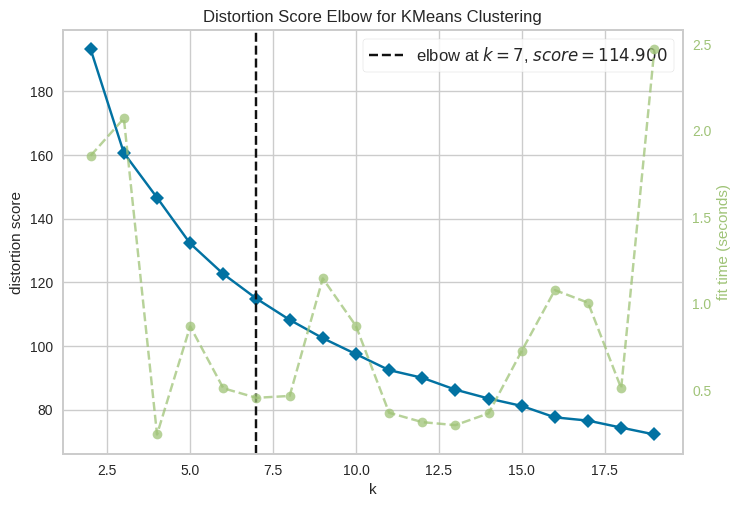

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# optimum küme sayısı belirleme
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(dff_scaled_model)
elbow.show()

In [ ]:
# 3. Modelinizi oluşturunuz ve müşterilerinizi segmentleyiniz.
k_means = KMeans(n_clusters = 7, random_state= 42).fit(dff_scaled_model)
segments = k_means.labels_
segments

array([2, 1, 0, 1, 1, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5,
       2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 5, 0, 5, 2, 6, 0, 5, 5, 2, 2, 0, 0, 2, 0, 2, 6, 3, 6, 4, 6, 1,
       6, 5, 5, 4, 0, 1, 1, 6, 6, 6, 1, 1, 1, 6, 6, 1, 6, 1, 6, 4, 1, 1,
       1, 1, 1, 6, 3, 6, 6, 1, 6, 3, 3, 3, 3, 6, 3, 2, 1, 1, 1, 1, 1, 3,
       6, 1, 3, 1, 3, 1, 2, 6, 2, 5, 5, 5, 0, 4, 5, 4, 2, 4, 6, 0, 1, 6,
       1, 6, 1, 1, 0, 1, 6, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 5, 5, 2, 6, 6, 0, 1, 4, 1, 4, 6, 5, 3, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5,
       1, 5, 5, 5, 2, 2, 2, 1, 4, 5, 5, 5, 5, 1, 5, 5, 5, 5, 4, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2,

In [ ]:
final_df = merged_df
final_df["segment"] = segments
final_df.head()

,ilce_adi,mahalle_adi,mahalle_uavt,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma,1980_oncesi,1980-2000_arasi,2000_sonrasi,1-4 kat_arasi,5-9 kat_arasi,9-19 kat_arasi,mahalle_nufus,segment
0,ADALAR,BURGAZADA,40139,54,99,256,241,8,6,24,42,0,0,1,398,433.000,214.000,173.000,802.000,18.000,0.000,1455,2
1,ADALAR,HEYBELÝADA,40142,101,175,423,393,25,21,66,113,1,1,2,763,836.000,347.000,212.000,1359.000,36.000,0.000,4158,1
2,ADALAR,KINALIADA,40143,53,97,287,302,5,3,15,27,0,1,1,420,610.000,244.000,158.000,923.000,89.000,0.000,1795,0
3,ADALAR,MADEN,40140,104,192,483,484,22,18,64,113,1,1,2,847,863.000,510.000,308.000,1637.000,44.000,0.000,4349,1
4,ADALAR,NÝZAM,40141,101,180,445,422,16,13,48,83,1,2,2,687,842.000,426.000,217.000,1434.000,51.000,0.000,3150,1


In [ ]:
# 4. Herbir segmenti istatistiksel olarak inceleyeniz.
final_df.groupby("segment").agg({"cok_agir_hasarli_bina_sayisi":["mean","min","max"],
                                  "agir_hasarli_bina_sayisi":["mean","min","max"],
                                  "orta_hasarli_bina_sayisi":["mean","min","max"],
                                  "hafif_hasarli_bina_sayisi":["mean","min","max"],
                                  "can_kaybi_sayisi":["mean","min","max"],
                                  "agir_yarali_sayisi":["mean","min","max","count"],
                                  "hastanede_tedavi_sayisi":["mean","min","max","count"]})

cok_agir_hasarli_bina_sayisi          agir_hasarli_bina_sayisi           orta_hasarli_bina_sayisi            hafif_hasarli_bina_sayisi            can_kaybi_sayisi          agir_yarali_sayisi                hastanede_tedavi_sayisi                
                                mean min  max                     mean  min  max                     mean  min   max                      mean  min   max             mean min  max               mean min  max count                    mean  min  max count
segment                                                                                                                                                                                                                                                      
0                              8.383   1   53                   23.149    3   97                  121.915   15   297                   335.731   68   759            6.453   0   25              3.672   0   18   201                  20.204    0   65   201
1                             34.577   6  104                   70.990   14  192                  256.404   40   483                   439.096   77   991           41.452  16   72             24.154   8   41   104                 110.596   48  185   104
2                              3.575   0   54                   10.083    0   99                   48.278    0   256                   118.386    2   377            1.685   0   27              0.961   0   15   435                   5.340    0   70   435
3                             93.667  37  201                  189.867  126  310                  650.067  393   924                   992.067  488  1466          156.267  87  230             86.667  46  122    15                 412.000  252  592    15
4                             37.000  19   66                  160.389   93  313                  709.222  369  1565                  1139.778  524  2452           18.111   1   50              9.500   0   27    18                  62.944    9  147    18
5                             10.504   1   62                   43.364    4  126                  223.504   46   490                   485.450  161  1045            6.101   0   25              3.163   0   14   129                  22.333    0   82   129
6                             59.556  12  137                  121.000   39  238                  421.963  126   673                   709.537  306  1251           80.130  19  128             46.907   8   85    54                 212.889   61  335    54

In [ ]:
final_df["segment"].value_counts()

2    435
0    201
5    129
1    104
6     54
4     18
3     15
Name: segment, dtype: int64

In [ ]:
final_df.loc[final_df["segment"] == 3, "ilce_adi"].value_counts()

BAHÇELÝEVLER    6
KÜÇÜKÇEKMECE    4
BAKIRKÖY        3
AVCILAR         1
BEYLÝKDÜZÜ      1
Name: ilce_adi, dtype: int64

In [ ]:
final_df.loc[final_df["segment"] == 6, "ilce_adi"].value_counts()

KÜÇÜKÇEKMECE    9
BAÐCILAR        8
FATÝH           8
AVCILAR         4
BAHÇELÝEVLER    4
BAYRAMPAÞA      4
ZEYTÝNBURNU     4
BEYLÝKDÜZÜ      3
GÜNGÖREN        3
BAKIRKÖY        2
ESENLER         2
TUZLA           2
ATAÞEHÝR        1
Name: ilce_adi, dtype: int64

## 3.3. Model ve final_df'in kaydedilmesi

In [ ]:
import joblib

In [ ]:
# Modelin daha sonradan kullanılabilmesi için kaydedilmesi..:
joblib.dump(k_means, "/content/drive/MyDrive/MiuulProje/deprem_kmeans.pkl")

['/content/drive/MyDrive/MiuulProje/deprem_kmeans.pkl']

In [ ]:
# Verisetinin son halinin kaydedilmesi..:
final_df.to_csv("/content/drive/MyDrive/MiuulProje/depre_final_df.csv")

In [ ]:
# Kayıt edilen modeli bir çekip deneme yapalım:
saved_model = joblib.load("/content/drive/MyDrive/MiuulProje/deprem_kmeans.pkl")
random_user = dff_scaled_model.sample(1, random_state=42)

In [ ]:
saved_model.predict(random_user)

array([2], dtype=int32)